# Introduction

In this project, we embark on an in-depth exploration of the evolution of TensorFlow posts on StackOverflow. Our goal is to uncover emerging trends, dissect prevalent research questions, and identify the core topics that have captivated the community's interest. Additionally, we aim to highlight the common challenges and pain points faced by users as they work with this powerful machine learning framework. By leveraging comprehensive data analysis, we aspire to provide valuable insights that could guide future development, support community learning, and enhance the overall user experience with TensorFlow.

# Dataset Summary

For this study, we utilized the StackOverflow data dump provided by the StackExchange community, downloaded in June 2023. The dataset comprises eight files: badges.xml, comments.xml, postHistory.xml, postLinks.xml, posts.xml, tags.xml, users.xml, and votes.xml. These files contain detailed information about various entities on the StackOverflow platform, commonly used in research.

Key entities and attributes include:

- **Posts**: Contains both questions and answers, identified by PostTypeId (1 for questions, 2 for answers). Attributes include unique identifiers, titles, bodies, creation timestamps, user IDs, and associated tags.
- **Answers**: Linked to specific questions, with attributes like answer identifiers, bodies, creation timestamps, user IDs, and acceptance status.
- **Comments**: Textual contributions on posts, with comment identifiers, texts, creation timestamps, and user IDs.
- **Users**: Individuals interacting with the platform, identified by user identifiers, usernames, reputation scores, creation dates, and activity statistics.
- **Tags**: Labels indicating the topics of questions, with unique identifiers and names.
- **Votes**: User evaluations of posts, including upvotes, downvotes, and favorites, with information about the voter and the target entity.

Each post in the posts.xml file is uniquely identified, and key attributes such as OwnerUserId, CreationDate, Score, Title (for questions), Body, and AcceptedAnswerId (for questions) are provided to facilitate detailed analysis.


# Setup

Import the necessary libraries and set up any connection/configurations.

In [1]:
# pip install mysql
# !pip install mysql-connector-python

In [1]:
#Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import Error
pd.set_option('display.max_colwidth', 200)

In [2]:
#DB Connection functions
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [3]:
#DB Connection establishment
db="stackoverflow"
pw="Password"
connection = create_db_connection("localhost", "root", pw, db)


MySQL Database connection successful


# Research Question 1: How TensorFlow Posts evolve over the period of time on StackOverflow?

## RQ 1.1: What is the overall trend of TensorFlow questions on Stack Overflow?

To analyze the overall trend of TensorFlow questions, we define an SQL query to retrieve the yearly count of questions, the number of questions with accepted answers, and the total views since 2015. The query groups data by year and orders it chronologically.

Note:TensorFlow was conceived and developed by the Google Brain team. It was released as an open-source software library for machine learning and artificial intelligence on November 9, 2015.

In [4]:
# Define the SQL query
query = """
SELECT YEAR(CreationDate) AS Year, 
       COUNT(*) AS TotalQuestions,
       SUM(CASE WHEN AcceptedAnswerId IS NOT NULL THEN 1 ELSE 0 END) AS QuestionsWithAcceptedAnswers,
       SUM(ViewCount) AS TotalViews
FROM posts_tensorflow02
WHERE YEAR(CreationDate) >= 2015
  AND PostTypeId >= 1 
GROUP BY YEAR(CreationDate)
ORDER BY Year;
"""

In [5]:
# Execute the query and retrieve the results into a pandas DataFrame
df = pd.read_sql(query, connection)

C:\Users\x8i10\AppData\Local\Temp\ipykernel_11752\1084985810.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [6]:
# Close the database connection
connection.close()

In [7]:
# Display the DataFrame
df

,Year,TotalQuestions,QuestionsWithAcceptedAnswers,TotalViews
0,2015,448,271.0,8291350.0
1,2016,5848,2725.0,36461879.0
2,2017,16053,6995.0,54835322.0
3,2018,18271,7378.0,41220551.0
4,2019,18066,6929.0,31542432.0
5,2020,18792,7040.0,25220701.0
6,2021,12732,4434.0,11709802.0
7,2022,11125,2897.0,5343745.0
8,2023,4102,574.0,380872.0


## Bar chart visualization

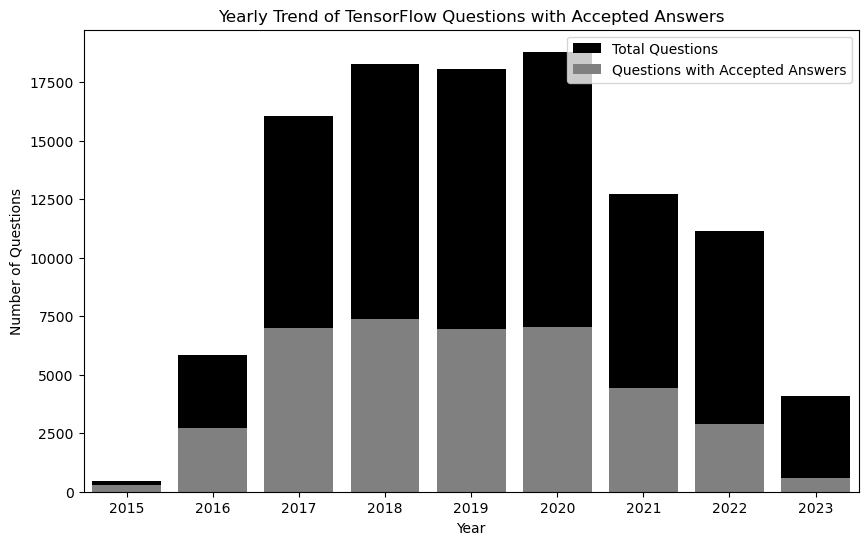

In [8]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the total number of questions as a bar chart
sns.barplot(data=df, x='Year', y='TotalQuestions', color='black', label='Total Questions')

# Plot the count of questions with accepted answers as a bar chart
sns.barplot(data=df, x='Year', y='QuestionsWithAcceptedAnswers', color='gray', label='Questions with Accepted Answers')

# Set the title and labels
plt.title('Yearly Trend of TensorFlow Questions with Accepted Answers')
plt.xlabel('Year')
plt.ylabel('Number of Questions')

# Add a legend
plt.legend()

# Show the plot
plt.show()



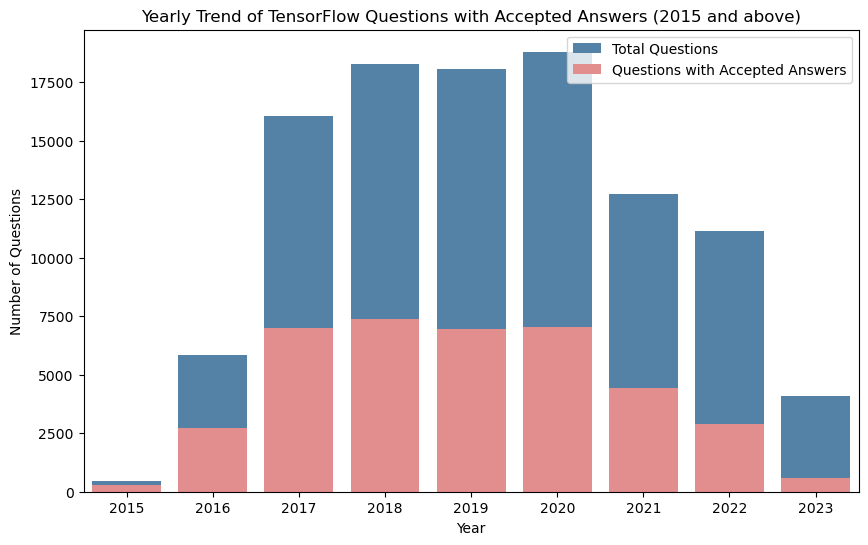

In [20]:

# Your dataset
data = {
    'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'TotalQuestions': [2, 2, 4, 5, 2, 19, 24, 448, 5848, 16053, 18271, 18066, 18792, 12732, 11125, 4102],
    'QuestionsWithAcceptedAnswers': [0, 2, 3, 3, 1, 7, 13, 271, 2725, 6995, 7378, 6929, 7040, 4434, 2897, 574]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Filter the DataFrame to include only data from 2015 and above
df_filtered = df[df['Year'] >= 2015]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the total number of questions as a bar chart
sns.barplot(data=df_filtered, x='Year', y='TotalQuestions', color='steelblue', label='Total Questions')

# Plot the count of questions with accepted answers as a bar chart
sns.barplot(data=df_filtered, x='Year', y='QuestionsWithAcceptedAnswers', color='lightcoral', label='Questions with Accepted Answers')

# Set the title and labels
plt.title('Yearly Trend of TensorFlow Questions with Accepted Answers (2015 and above)')
plt.xlabel('Year')
plt.ylabel('Number of Questions')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## Line chart visualization

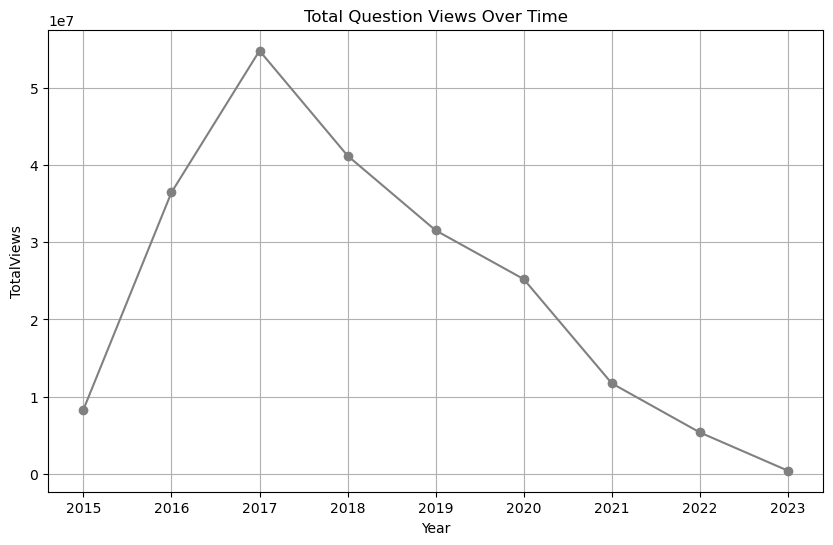

In [19]:
# Data
years = df['Year']
total_views = df['TotalViews']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(years, total_views, marker='o', color='gray')
plt.title('Total Question Views Over Time')
plt.xlabel('Year')
plt.ylabel('TotalViews')
plt.xticks(years)
plt.grid(True)
plt.show()

## RQ 1.2: What is the average time taken to receive an acceptable answer for TensorFlow questions on Stack Overflow?

To investigate the average time taken to receive an acceptable answer for TensorFlow questions on Stack Overflow, we formulate two SQL queries:

1. Query 1.2a calculates the overall average response time in seconds and days for questions that have accepted answers.
2. Query 1.2b breaks down the average response time by year, providing insights into the yearly trends in response times. The response time is presented in seconds, hours, and days for better understanding.


In [21]:
#DB Connection establishment
db="stackoverflow"
pw="Password"
connection = create_db_connection("localhost", "root", pw, db)

MySQL Database connection successful


In [23]:
# Define the SQL query
query1_2a = """
SELECT 
  AVG(TIME_TO_SEC(TIMEDIFF(a.CreationDate, q.CreationDate))) AS AvgResponseTimeInSeconds,
  AVG(TIME_TO_SEC(TIMEDIFF(a.CreationDate, q.CreationDate))) / 86400 AS AvgResponseTimeInDays
FROM 
  posts_tensorflow02 q
JOIN 
  posts a ON q.AcceptedAnswerId = a.Id
WHERE 
  q.AcceptedAnswerId IS NOT NULL;
"""

In [24]:
# Define the SQL query
query1_2b = """
SELECT 
    YEAR(q.CreationDate) AS Year,
    AVG(TIME_TO_SEC(TIMEDIFF(a.CreationDate, q.CreationDate))) AS AvgResponseTimeInSeconds,
    AVG(TIME_TO_SEC(TIMEDIFF(a.CreationDate, q.CreationDate))) / 3600 AS AvgResponseTimeInHours,
    AVG(TIME_TO_SEC(TIMEDIFF(a.CreationDate, q.CreationDate))) / (3600 * 24) AS AvgResponseTimeInDays
FROM posts_tensorflow02 q
JOIN posts a ON q.AcceptedAnswerId = a.Id
WHERE q.AcceptedAnswerId IS NOT NULL
AND YEAR(q.CreationDate) > 2014
GROUP BY YEAR(q.CreationDate)
ORDER BY Year;
"""

In [25]:
# Execute the query and retrieve the results into a pandas DataFrame
df1_2a = pd.read_sql(query1_2a, connection)
df1_2b = pd.read_sql(query1_2b, connection)

C:\Users\x8i10\AppData\Local\Temp\ipykernel_18368\2532834601.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1_2a = pd.read_sql(query1_2a, connection)
C:\Users\x8i10\AppData\Local\Temp\ipykernel_18368\2532834601.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1_2b = pd.read_sql(query1_2b, connection)


In [26]:
# Close the database connection
connection.close()

In [27]:
# Display the DataFrame
df1_2a

,AvgResponseTimeInSeconds,AvgResponseTimeInDays
0,325680.0115,3.769445


In [28]:
# Display the DataFrame
df1_2b

,Year,AvgResponseTimeInSeconds,AvgResponseTimeInHours,AvgResponseTimeInDays
0,2015,389332.7122,108.147976,4.506166
1,2016,421544.4683,117.095686,4.878987
2,2017,369524.7179,102.645755,4.276906
3,2018,304815.0073,84.670835,3.527951
4,2019,319234.5040,88.676251,3.694844
5,2020,319903.3553,88.862043,3.702585
6,2021,288437.6710,80.121575,3.338399
7,2022,280051.0031,77.791945,3.241331
8,2023,230280.0296,63.966675,2.665278


## RQ 1.3: How many questions are successful in getting responses from the software development community?

To determine the success rate of questions in receiving responses from the software development community, we construct an SQL query. The query categorizes questions into four types based on their interaction with the community: Successful (questions with accepted answers), Ordinary (questions with answers but not accepted), Comments-Only (questions with comments but no answers), and Unsuccessful (questions with no responses). The query calculates the number of questions for each type and their respective percentages relative to the total number of questions posted from 2015 onwards.

In addition to assessing the success rate, we also analyze the time taken to receive responses. This includes examining the time to accepted answer, hourly average response time to accepted answers, and the time to the first answer.



In [7]:
#DB Connection establishment
db="stackoverflow"
pw="Password"
connection = create_db_connection("localhost", "root", pw, db)

MySQL Database connection successful


In [8]:
# Define the SQL query
query1_3 = """
SELECT
    Question_Type,
    Number_Of_Questions,
    CONCAT(ROUND((Number_Of_Questions / total_questions * 100), 2), '%') AS Percentage
FROM
    (
        SELECT
            CASE
                WHEN ques.AcceptedAnswerId IS NOT NULL THEN 'Successful'
                WHEN ans.Id IS NOT NULL THEN 'Ordinary'
                WHEN com.comment_count > 0 THEN 'Comments-Only'
                ELSE 'Unsuccessful'
            END AS Question_Type,
            COUNT(DISTINCT ques.Id) AS Number_Of_Questions
        FROM
            posts_tensorflow02 AS ques
        LEFT JOIN
            posts AS ans ON ques.Id = ans.ParentId AND ans.PostTypeId = 2 -- Join to find ordinary questions with answers
        LEFT JOIN
            (
                SELECT
                    PostId,
                    COUNT(*) AS comment_count
                FROM
                    comments02
                GROUP BY
                    PostId
            ) AS com ON ques.Id = com.PostId
        WHERE
            ques.PostTypeId = 1 -- PostTypeId 1 represents questions
            AND YEAR(ques.CreationDate) >= 2015 -- Filtering questions from the year 2015 and above
        GROUP BY
            Question_Type
    ) AS question_counts
CROSS JOIN
    (
        SELECT COUNT(DISTINCT Id) AS total_questions
        FROM posts_tensorflow02
        WHERE PostTypeId = 1 AND YEAR(CreationDate) >= 2015
    ) AS total_counts
ORDER BY
    Question_Type;
"""

In [9]:
# Execute the query and retrieve the results into a pandas DataFrame
df1_3 = pd.read_sql(query1_3, connection)


C:\Users\x8i10\AppData\Local\Temp\ipykernel_14312\778752208.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1_3 = pd.read_sql(query1_3, connection)


In [10]:
# Close the database connection
connection.close()

In [11]:
# Display the DataFrame
df1_3

,Question_Type,Number_Of_Questions,Percentage
0,Comments-Only,19042,18.06%
1,Ordinary,38722,36.73%
2,Successful,39243,37.22%
3,Unsuccessful,8428,7.99%


## Pie chart visualization

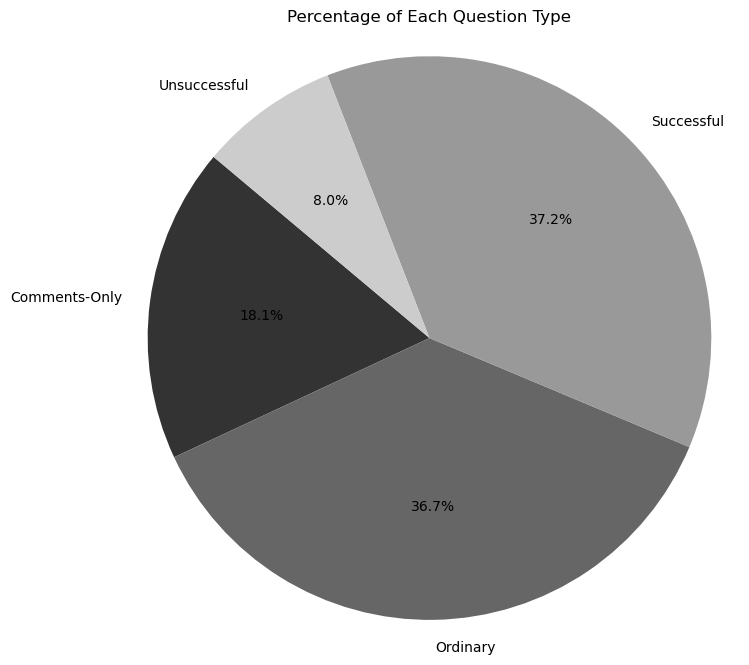

In [12]:
# Convert 'Percentage' column to float values
df1_3['Percentage'] = df1_3['Percentage'].str.rstrip('%').astype('float') / 100.0

# Data
question_types = df1_3['Question_Type']
number_of_questions = df1_3['Number_Of_Questions']
percentage = df1_3['Percentage']




# Custom colors for the pie chart
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
grayscale_colors = ['#333333', '#666666', '#999999', '#CCCCCC']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=question_types, autopct='%1.1f%%', startangle=140, colors=grayscale_colors)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Percentage of Each Question Type')
plt.show()

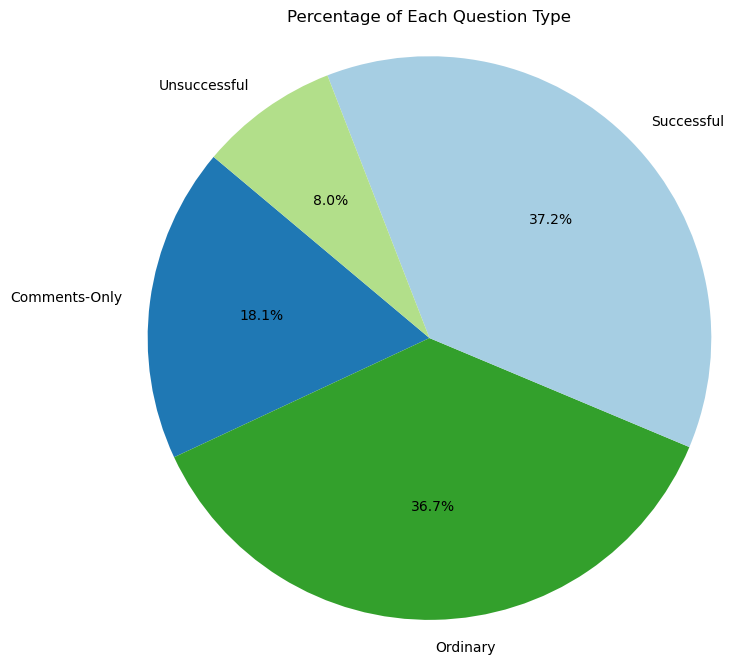

In [46]:
# Custom colors for the pie chart
attractive_colors = ['#1f78b4', '#33a02c', '#a6cee3', '#b2df8a']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage, labels=question_types, autopct='%1.1f%%', startangle=140, colors=attractive_colors)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Percentage of Each Question Type')
plt.show()

## Time to first answer and time to accepted answer

In [43]:
#DB Connection establishment
db="stackoverflow"
pw="Password"
connection = create_db_connection("localhost", "root", pw, db)

MySQL Database connection successful


In [44]:
# SQL query to fetch data for the time to accepted answer
query_accepted_answer = """
SELECT
    TIMESTAMPDIFF(HOUR, ques.CreationDate, ans.CreationDate) AS TimeToAcceptedAnswer
FROM
    posts_tensorflow02 AS ques
LEFT JOIN
    posts AS ans ON ques.AcceptedAnswerId = ans.Id
WHERE
    ques.PostTypeId = 1
    AND ans.PostTypeId = 2
    AND YEAR(ques.CreationDate) >= 2015
    AND YEAR(ans.CreationDate) >= 2015
    AND ans.CreationDate >= ques.CreationDate
"""

# SQL query to fetch data for the hourly_average_response_time to accepted answer
query_hourly_average_response_accepted_answer = """
SELECT 
    HOUR(q.CreationDate) AS HourOfDay,
    COUNT(*) AS NumQuestions,
    AVG(TIME_TO_SEC(TIMEDIFF(a.CreationDate, q.CreationDate))) AS AvgResponseTimeInSeconds,
    AVG(TIME_TO_SEC(TIMEDIFF(a.CreationDate, q.CreationDate))) / 3600 AS AvgResponseTimeInHours,
    AVG(TIME_TO_SEC(TIMEDIFF(a.CreationDate, q.CreationDate))) / (3600 * 24) AS AvgResponseTimeInDays
FROM 
    posts_tensorflow02 q
JOIN 
    answers_tensorflow02 a ON q.AcceptedAnswerId = a.Id
WHERE 
    q.PostTypeId = 1 -- 1 represents questions
    AND q.AcceptedAnswerId IS NOT NULL
    AND YEAR(q.CreationDate) >= 2015 -- Consider years from 2015 and above
GROUP BY 
    HOUR(q.CreationDate)
ORDER BY 
    HourOfDay;
"""

# SQL query to fetch data for the time to first answer
query_first_answer = """
SELECT
    TIMESTAMPDIFF(HOUR, ques.CreationDate, MIN(ans.CreationDate)) AS TimeToFirstAnswer
FROM
    posts_tensorflow02 AS ques
LEFT JOIN
    posts AS ans ON ques.Id = ans.ParentId
WHERE
    ques.PostTypeId = 1
    AND ans.PostTypeId = 2
    AND YEAR(ques.CreationDate) >= 2015
    AND YEAR(ans.CreationDate) >= 2015
GROUP BY
    ques.Id;"""

In [45]:
# Fetch data from MySQL and create DataFrames
data_accepted_answer = pd.read_sql(query_accepted_answer, connection)
data_hourly_average_response_accepted_answer = pd.read_sql(query_hourly_average_response_accepted_answer, connection)
data_first_answer = pd.read_sql(query_first_answer, connection)


# Define column names for the DataFrame hourly_average_response_accepted_answer
columns = ['HourOfDay', 'NumQuestions', 'AvgResponseTimeInSeconds', 'AvgResponseTimeInHours', 'AvgResponseTimeInDays']
df_hourly_average_response_accepted_answer = pd.DataFrame(data_hourly_average_response_accepted_answer, columns=columns)


df_accepted_answer = pd.DataFrame(data_accepted_answer, columns=['TimeToAcceptedAnswer'])
df_first_answer = pd.DataFrame(data_first_answer, columns=['TimeToFirstAnswer'])


C:\Users\x8i10\AppData\Local\Temp\ipykernel_12216\637429496.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_accepted_answer = pd.read_sql(query_accepted_answer, connection)
C:\Users\x8i10\AppData\Local\Temp\ipykernel_12216\637429496.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_hourly_average_response_accepted_answer = pd.read_sql(query_hourly_average_response_accepted_answer, connection)
C:\Users\x8i10\AppData\Local\Temp\ipykernel_12216\637429496.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_

In [46]:
# Close the database connection
connection.close()

In [47]:
df_hourly_average_response_accepted_answer

,HourOfDay,NumQuestions,AvgResponseTimeInSeconds,AvgResponseTimeInHours,AvgResponseTimeInDays
0,0,970,312729.2969,86.869249,3.619552
1,1,948,309585.6002,85.996000,3.583167
2,2,980,319080.6224,88.633506,3.693063
3,3,1078,308849.9425,85.791651,3.574652
4,4,980,320124.9663,88.923602,3.705150
5,5,1077,285043.0028,79.178612,3.299109
6,6,1347,351860.6563,97.739071,4.072461
7,7,1584,315837.3718,87.732603,3.655525
8,8,1818,297831.7756,82.731049,3.447127
9,9,2036,298522.5977,82.922944,3.455123


## Visualization

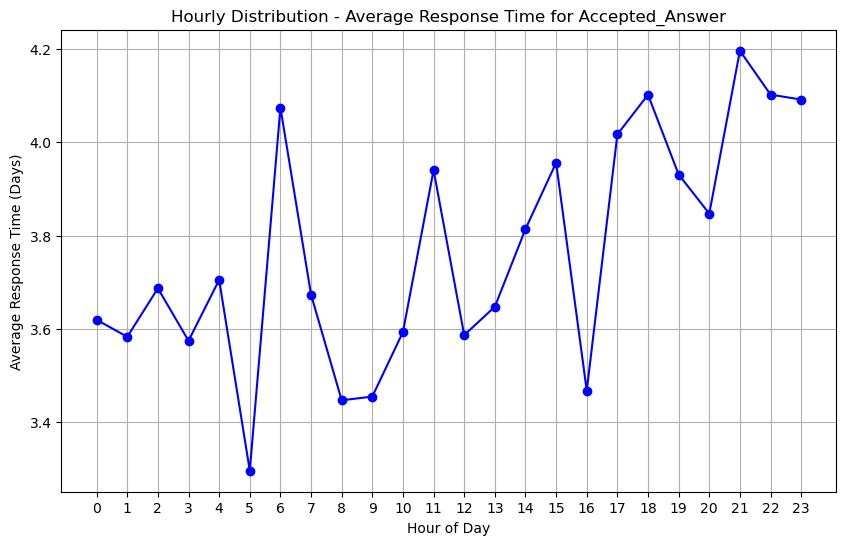

In [30]:
import matplotlib.pyplot as plt

# Data
hour_of_day = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
avg_response_time_in_days = [3.61955205, 3.58316667, 3.68698914, 3.57465211, 3.70515007, 3.29627139, 4.07415624, 3.67337493,
                              3.44712703, 3.45512266, 3.59347469, 3.94025917, 3.58674590, 3.64759243, 3.81397347, 3.95598200,
                              3.46782003, 4.01672912, 4.10175337, 3.93077501, 3.84705468, 4.19598803, 4.10194047, 4.09137358]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(hour_of_day, avg_response_time_in_days, marker='o', color='b', linestyle='-')
plt.title('Hourly Distribution - Average Response Time for Accepted_Answer')
plt.xlabel('Hour of Day')
plt.ylabel('Average Response Time (Days)')
plt.xticks(hour_of_day)
plt.grid(True)
plt.show()


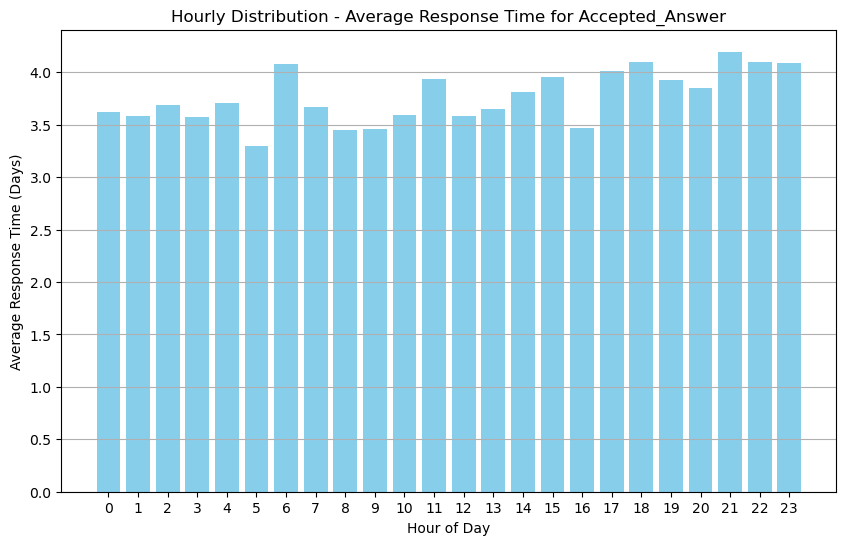

In [31]:
import matplotlib.pyplot as plt

# Data
hour_of_day = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
avg_response_time_in_days = [3.61955205, 3.58316667, 3.68698914, 3.57465211, 3.70515007, 3.29627139, 4.07415624, 3.67337493,
                              3.44712703, 3.45512266, 3.59347469, 3.94025917, 3.58674590, 3.64759243, 3.81397347, 3.95598200,
                              3.46782003, 4.01672912, 4.10175337, 3.93077501, 3.84705468, 4.19598803, 4.10194047, 4.09137358]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(hour_of_day, avg_response_time_in_days, color='skyblue')
plt.title('Hourly Distribution - Average Response Time for Accepted_Answer')
plt.xlabel('Hour of Day')
plt.ylabel('Average Response Time (Days)')
plt.xticks(hour_of_day)
plt.grid(axis='y')
plt.show()


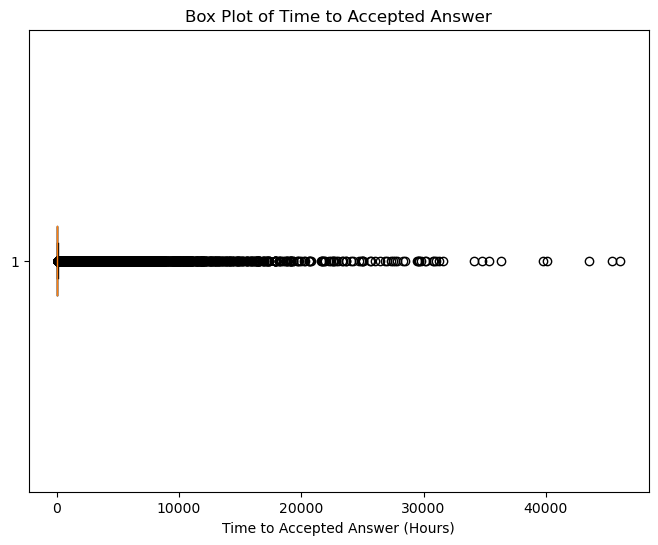

In [33]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data_accepted_answer['TimeToAcceptedAnswer'], vert=False)
plt.xlabel('Time to Accepted Answer (Hours)')
plt.title('Box Plot of Time to Accepted Answer')
plt.show()

In [34]:
# Convert hours to days
data_accepted_answer['TimeToAcceptedAnswer'] = data_accepted_answer['TimeToAcceptedAnswer'] / 24

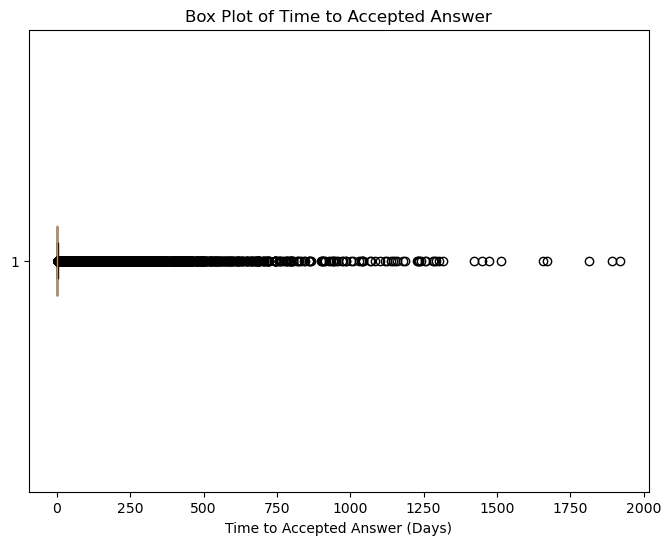

In [36]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data_accepted_answer['TimeToAcceptedAnswer'], vert=False)
plt.xlabel('Time to Accepted Answer (Days)')
plt.title('Box Plot of Time to Accepted Answer')
plt.show()

In [37]:
# Calculate average and median
average_time = data_accepted_answer['TimeToAcceptedAnswer'].mean()
median_time = data_accepted_answer['TimeToAcceptedAnswer'].median()

In [38]:
# Print average and median
print("Average Time to Accepted Answer:", average_time, "days")
print("Median Time to Accepted Answer:", median_time, "days")

Average Time to Accepted Answer: 14.716182928590236 days
Median Time to Accepted Answer: 0.125 days


In [48]:
df_accepted_answer

,TimeToAcceptedAnswer
0,5
1,0
2,1
3,2
4,1
...,...
39238,0
39239,0
39240,18
39241,5


In [49]:
df_first_answer

,TimeToFirstAnswer
0,5
1,0
2,1
3,2
4,2
...,...
77960,0
77961,18
77962,9
77963,1


# Visualization

In [64]:
df_accepted_answer['TimeToAcceptedAnswer'].max()

46094

In [80]:
df_first_answer['TimeToFirstAnswer'].max()

57790

In [90]:
# Assuming you have a DataFrame called df_accepted_answer and df_first_answer

# Group the data by hourly intervals for accepted answers
hourly_intervals_01 = range(0, df_accepted_answer['TimeToAcceptedAnswer'].max() + 1)
df_accepted_answer['TimeToAcceptedAnswer_intervals'] = pd.cut(df_accepted_answer['TimeToAcceptedAnswer'], bins=hourly_intervals_01, right=True)
df_accepted_answer_grouped = df_accepted_answer.groupby('TimeToAcceptedAnswer_intervals').size().reset_index(name='Frequency')

# Group the data by hourly intervals for first answers
hourly_intervals_02 = range(0, df_first_answer['TimeToFirstAnswer'].max() + 1)
df_first_answer['TimeToFirstAnswer_intervals'] = pd.cut(df_first_answer['TimeToFirstAnswer'], bins=hourly_intervals_02, right=True)
df_first_answer_grouped = df_first_answer.groupby('TimeToFirstAnswer_intervals').size().reset_index(name='Frequency')


In [91]:
df_accepted_answer_grouped

,TimeToAcceptedAnswer_intervals,Frequency
0,"(0, 1]",4238
1,"(1, 2]",2256
2,"(2, 3]",1535
3,"(3, 4]",1088
4,"(4, 5]",872
...,...,...
46089,"(46089, 46090]",0
46090,"(46090, 46091]",0
46091,"(46091, 46092]",0
46092,"(46092, 46093]",0


In [92]:
df_first_answer_grouped

,TimeToFirstAnswer_intervals,Frequency
0,"(0, 1]",7668
1,"(1, 2]",4191
2,"(2, 3]",2821
3,"(3, 4]",2029
4,"(4, 5]",1637
...,...,...
57785,"(57785, 57786]",0
57786,"(57786, 57787]",0
57787,"(57787, 57788]",0
57788,"(57788, 57789]",0


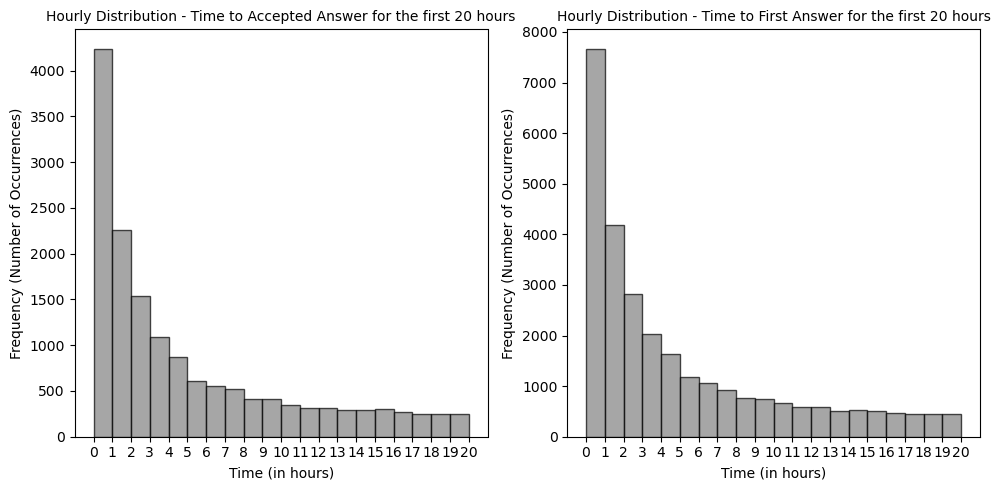

In [93]:
# Extracting midpoints of intervals for "Time to Accepted Answer"
df_accepted_answer_grouped['Midpoint'] = df_accepted_answer_grouped['TimeToAcceptedAnswer_intervals'].apply(lambda x: x.mid)

# Extracting midpoints of intervals for "Time to First Answer"
df_first_answer_grouped['Midpoint'] = df_first_answer_grouped['TimeToFirstAnswer_intervals'].apply(lambda x: x.mid)

# Define custom bin edges
bin_edges = list(range(0, 21))  # [0, 1, 2, ..., 19, 20]

# Plotting the histograms
plt.figure(figsize=(10, 5))

# Plot for "Time to Accepted Answer"
plt.subplot(1, 2, 1)
plt.hist(df_accepted_answer_grouped["Midpoint"], bins=bin_edges, weights=df_accepted_answer_grouped["Frequency"], edgecolor='black', alpha=0.7, color='gray')
plt.title("Hourly Distribution - Time to Accepted Answer for the first 20 hours", fontsize=10)
plt.xlabel("Time (in hours)")
plt.ylabel("Frequency (Number of Occurrences)")
plt.xticks(range(0, 21))

# Plot for "Time to First Answer"
plt.subplot(1, 2, 2)
plt.hist(df_first_answer_grouped["Midpoint"], bins=bin_edges, weights=df_first_answer_grouped["Frequency"], edgecolor='black', alpha=0.7, color='gray')
plt.title("Hourly Distribution - Time to First Answer for the first 20 hours", fontsize=10)
plt.xlabel("Time (in hours)")
plt.ylabel("Frequency (Number of Occurrences)")
plt.xticks(range(0, 21))

plt.tight_layout()
plt.show()

C:\Users\x8i10\AppData\Local\Temp\ipykernel_12216\266048859.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
C:\Users\x8i10\AppData\Local\Temp\ipykernel_12216\266048859.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)


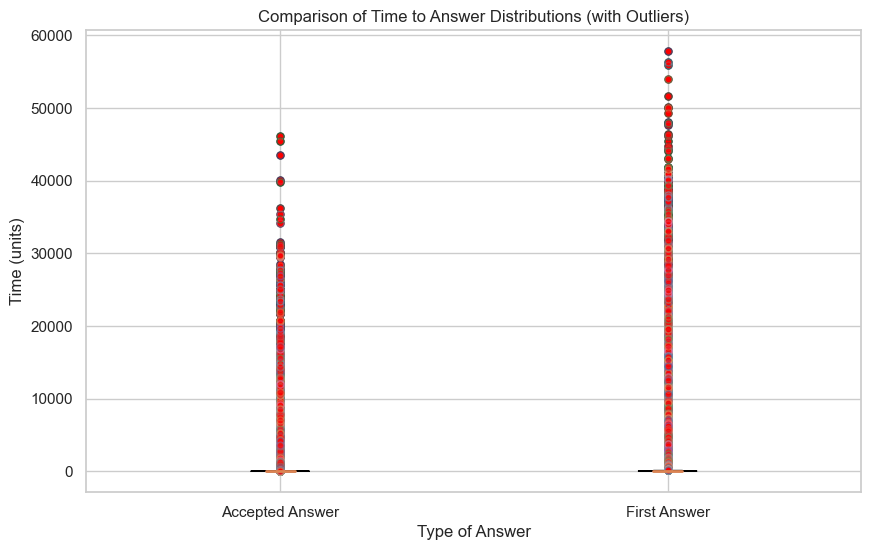

In [136]:
# DataFrames are defined as df_accepted_answer and df_first_answer

# Calculate quartiles (Q1, Q2, Q3) and IQR (Interquartile Range) for each DataFrame
def calculate_quartiles_and_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    return q1, q3, iqr

# Get quartiles and IQR for both DataFrames
accepted_q1, accepted_q3, accepted_iqr = calculate_quartiles_and_iqr(df_accepted_answer)
first_q1, first_q3, first_iqr = calculate_quartiles_and_iqr(df_first_answer)

# Define lower and upper whisker bounds based on 1.5xIQR rule
accepted_lower_whisker = max(accepted_q1.iloc[0] - 1.5 * accepted_iqr.iloc[0], df_accepted_answer['TimeToAcceptedAnswer'].min())
accepted_upper_whisker = min(accepted_q3.iloc[0] + 1.5 * accepted_iqr.iloc[0], df_accepted_answer['TimeToAcceptedAnswer'].max())

first_lower_whisker = max(first_q1.iloc[0] - 1.5 * first_iqr.iloc[0], df_first_answer['TimeToFirstAnswer'].min())
first_upper_whisker = min(first_q3.iloc[0] + 1.5 * first_iqr.iloc[0], df_first_answer['TimeToFirstAnswer'].max())



# Create the boxplot with clear outlier markers
plt.figure(figsize=(10, 6))
boxes = plt.boxplot([df_accepted_answer['TimeToAcceptedAnswer'], df_first_answer['TimeToFirstAnswer']],
                   notch=True,  # Add a notch for better median comparison
                   vert=True,     # Vertical boxplots
                   patch_artist=True,  # Allow customization of box fill color
                   medianprops={"linewidth": 2},  # Thicker median line
                   boxprops={"facecolor": "lightblue", "edgecolor": "black"},  # Box colors
                   flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5})  # Outlier markers

# Customize x-axis labels
plt.xticks([1, 2], ["Accepted Answer", "First Answer"])
plt.xlabel("Type of Answer")
plt.ylabel("Time (units)")
plt.title("Comparison of Time to Answer Distributions (with Outliers)")

# Highlight outliers beyond whiskers (optional)
outliers_accepted = df_accepted_answer[(df_accepted_answer['TimeToAcceptedAnswer'] < accepted_lower_whisker) | (df_accepted_answer['TimeToAcceptedAnswer'] > accepted_upper_whisker)]
for outlier in outliers_accepted['TimeToAcceptedAnswer']:
    plt.plot([1], [outlier], marker="o", markerfacecolor="red", markersize=5, alpha=0.5)

outliers_first = df_first_answer[(df_first_answer['TimeToFirstAnswer'] < first_lower_whisker) | (df_first_answer['TimeToFirstAnswer'] > first_upper_whisker)]
for outlier in outliers_first['TimeToFirstAnswer']:
    plt.plot([2], [outlier], marker="o", markerfacecolor="red", markersize=5, alpha=0.5)

plt.grid(True)
plt.show()


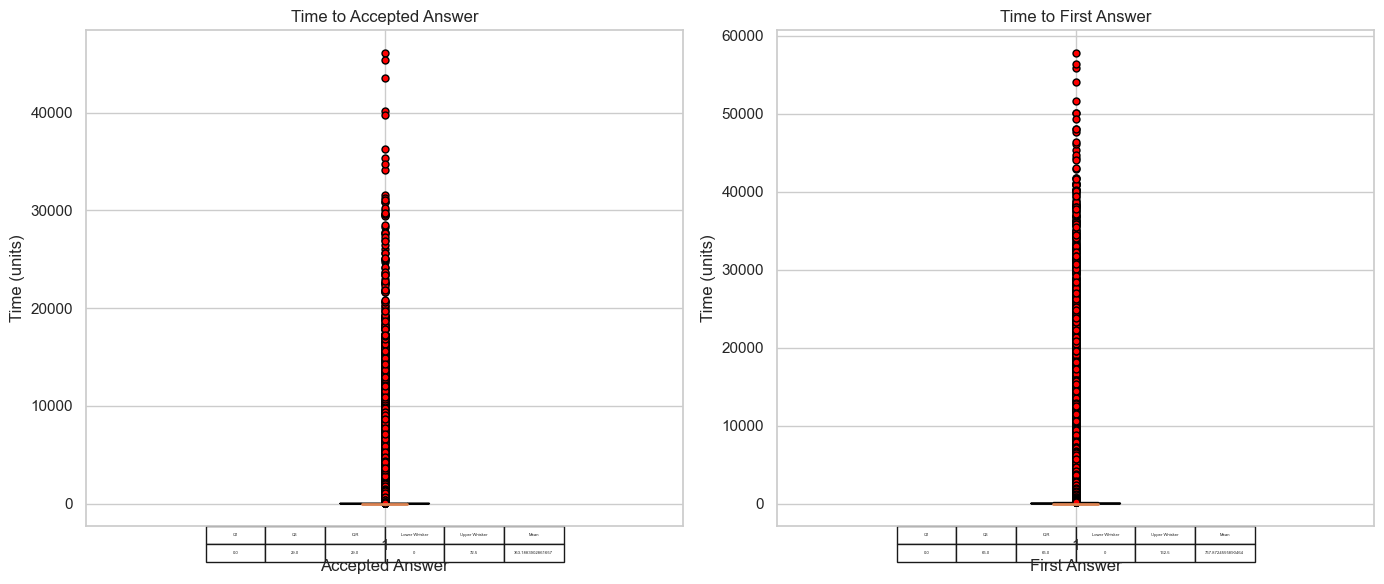

In [158]:
# Calculate quartiles (Q1, Q2, Q3) and IQR (Interquartile Range) for each DataFrame
def calculate_quartiles_and_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    return q1, q3, iqr

# Get quartiles and IQR for both DataFrames
accepted_q1, accepted_q3, accepted_iqr = calculate_quartiles_and_iqr(df_accepted_answer['TimeToAcceptedAnswer'])
first_q1, first_q3, first_iqr = calculate_quartiles_and_iqr(df_first_answer['TimeToFirstAnswer'])

# Calculate mean for each boxplot
accepted_mean = df_accepted_answer['TimeToAcceptedAnswer'].mean()
first_mean = df_first_answer['TimeToFirstAnswer'].mean()

# Define lower and upper whisker bounds based on 1.5xIQR rule
accepted_lower_whisker = max(accepted_q1 - 1.5 * accepted_iqr, df_accepted_answer['TimeToAcceptedAnswer'].min())
accepted_upper_whisker = min(accepted_q3 + 1.5 * accepted_iqr, df_accepted_answer['TimeToAcceptedAnswer'].max())

first_lower_whisker = max(first_q1 - 1.5 * first_iqr, df_first_answer['TimeToFirstAnswer'].min())
first_upper_whisker = min(first_q3 + 1.5 * first_iqr, df_first_answer['TimeToFirstAnswer'].max())

# Create separate boxplots for each DataFrame
plt.figure(figsize=(14, 6))

# Plot for df_accepted_answer
plt.subplot(1, 2, 1)
plt.boxplot(df_accepted_answer['TimeToAcceptedAnswer'],
            notch=True,
            vert=True,
            patch_artist=True,
            medianprops={"linewidth": 2},
            boxprops={"facecolor": "lightblue", "edgecolor": "black"},
            flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5})
plt.xlabel("Accepted Answer")
plt.ylabel("Time (units)")
plt.title("Time to Accepted Answer")

# Summary statistics for df_accepted_answer
plt.table(cellText=[[accepted_q1, accepted_q3, accepted_iqr, accepted_lower_whisker, accepted_upper_whisker, accepted_mean]],
          colLabels=["Q1", "Q3", "IQR", "Lower Whisker", "Upper Whisker", "Mean"],
          cellLoc="center",
          loc="bottom",
          colWidths=[0.1]*6, # Adjust column width
          fontsize=10) # Adjust font size

# Plot for df_first_answer
plt.subplot(1, 2, 2)
plt.boxplot(df_first_answer['TimeToFirstAnswer'],
            notch=True,
            vert=True,
            patch_artist=True,
            medianprops={"linewidth": 2},
            boxprops={"facecolor": "lightblue", "edgecolor": "black"},
            flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5})
plt.xlabel("First Answer")
plt.ylabel("Time (units)")
plt.title("Time to First Answer")

# Summary statistics for df_first_answer
plt.table(cellText=[[first_q1, first_q3, first_iqr, first_lower_whisker, first_upper_whisker, first_mean]],
          colLabels=["Q1", "Q3", "IQR", "Lower Whisker", "Upper Whisker", "Mean"],
          cellLoc="center",
          loc="bottom",
          colWidths=[0.1]*6, # Adjust column width
          fontsize=10) # Adjust font size

plt.tight_layout()
plt.show()


# RQ 3.1: How do user activity relate to their involvement with TensorFlow-related questions on Stack Overflow?

This analysis explores the relationship between user activity and their engagement with TensorFlow-related questions on Stack Overflow. The main query calculates various metrics such as the number of questions asked, answers provided, votes received, and accepted answers for each user. It categorizes user activity into three levels: Low Activity, Medium Activity, and High Activity, based on the total number of questions asked and answers provided. Additionally, a correlation query examines the covariance and standard deviation product between the number of questions asked and the number of answers provided by users. These analyses collectively provide insights into how user engagement levels correlate with their involvement in the TensorFlow community on Stack Overflow.


In [48]:
#DB Connection establishment
db="stackoverflow"
pw="Password"
connection = create_db_connection("localhost", "root", pw, db)

MySQL Database connection successful


In [49]:
query3_1 = """
WITH UserActivity AS (
    SELECT
        p.OwnerUserId AS UserId,
        COUNT(DISTINCT p.Id) AS NumQuestionsAsked,
        COALESCE(a.NumAnswersProvided, 0) AS NumAnswersProvided,
        COALESCE(v.NumVotesReceived, 0) AS NumVotesReceived,
        COALESCE(aa.NumAcceptedAnswers, 0) AS NumAcceptedAnswers
    FROM posts_tensorflow02 p
    LEFT JOIN (
        SELECT OwnerUserId, COUNT(*) AS NumAnswersProvided
        FROM answers_tensorflow02
        WHERE CreationDate >= '2015-01-01' -- Filter answers from 2015 and above
        GROUP BY OwnerUserId
    ) a ON p.OwnerUserId = a.OwnerUserId
    LEFT JOIN (
        SELECT OwnerUserId, SUM(Score) AS NumVotesReceived
        FROM (
            SELECT OwnerUserId, Score
            FROM posts_tensorflow02
            WHERE PostTypeId = 1 AND CreationDate >= '2015-01-01' -- Filter questions from 2015 and above
            UNION ALL
            SELECT OwnerUserId, Score
            FROM answers_tensorflow02
            WHERE CreationDate >= '2015-01-01' -- Filter answers from 2015 and above
        ) p
        GROUP BY OwnerUserId
    ) v ON p.OwnerUserId = v.OwnerUserId
    LEFT JOIN (
        SELECT OwnerUserId, COUNT(*) AS NumAcceptedAnswers
        FROM answers_tensorflow02
        WHERE Id IN (
            SELECT DISTINCT AcceptedAnswerId
            FROM posts_tensorflow02
            WHERE AcceptedAnswerId IS NOT NULL AND CreationDate >= '2015-01-01' -- Filter accepted answers from 2015 and above
        )
        GROUP BY OwnerUserId
    ) aa ON p.OwnerUserId = aa.OwnerUserId
    WHERE p.PostTypeId = 1 AND p.CreationDate >= '2015-01-01' -- Filter questions from 2015 and above
    GROUP BY p.OwnerUserId, a.NumAnswersProvided, v.NumVotesReceived, aa.NumAcceptedAnswers
)
SELECT
    UserId,
    NumQuestionsAsked,
    NumAnswersProvided,
    NumVotesReceived,
    NumAcceptedAnswers,
    CASE
        WHEN NumQuestionsAsked + NumAnswersProvided <= 5 THEN 'Low Activity'
        WHEN NumQuestionsAsked + NumAnswersProvided <= 10 THEN 'Medium Activity'
        ELSE 'High Activity'
    END AS ActivityLevel
FROM UserActivity;

"""


In [50]:
# Execute the query and retrieve the results into a pandas DataFrame
df3_1 = pd.read_sql(query3_1, connection)


C:\Users\x8i10\AppData\Local\Temp\ipykernel_14912\1371927545.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3_1 = pd.read_sql(query3_1, connection)


In [51]:
# Close the database connection
connection.close()

In [52]:
df3_1

,UserId,NumQuestionsAsked,NumAnswersProvided,NumVotesReceived,NumAcceptedAnswers,ActivityLevel
0,0,1306,2806,4873.0,666,High Activity
1,184,1,0,1.0,0,Low Activity
2,617,1,0,1.0,0,Low Activity
3,1946,1,0,0.0,0,Low Activity
4,3063,2,0,7.0,0,Low Activity
...,...,...,...,...,...,...
59702,22009721,1,0,0.0,0,Low Activity
59703,22010140,1,0,0.0,0,Low Activity
59704,22010321,1,0,0.0,0,Low Activity
59705,22011211,1,0,-1.0,0,Low Activity


In [53]:
# fetched the data from the database into a pandas DataFrame 'df'
activity_counts = df3_1['ActivityLevel'].value_counts()

In [54]:
activity_counts

Low Activity       55574
Medium Activity     2525
High Activity       1608
Name: ActivityLevel, dtype: int64

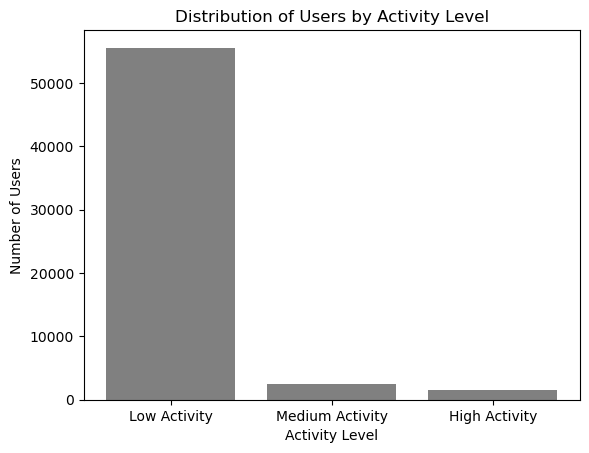

In [55]:
# Create a bar chart to visualize the distribution of users across activity levels
plt.bar(activity_counts.index, activity_counts.values, color='gray')
plt.xlabel('Activity Level')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Activity Level')
plt.show()

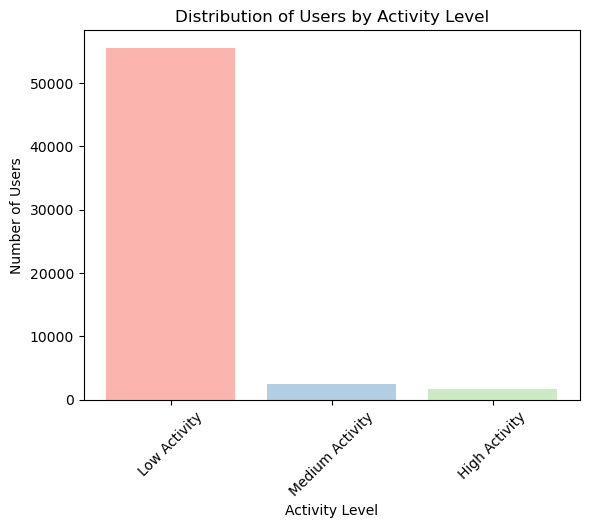

In [65]:
# Count the occurrences of each activity level
activity_counts = df3_1['ActivityLevel'].value_counts()

# Define a color palette with vibrant and contrasting colors
attractive_colors = sns.color_palette("Pastel1", len(activity_counts))

# Create a bar chart with the custom colors
plt.bar(activity_counts.index, activity_counts.values, color=attractive_colors)
plt.xlabel('Activity Level')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Activity Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### CORRELATION ANALYSIS

In [20]:
#DB Connection establishment
db="stackoverflow"
pw="Password"
connection = create_db_connection("localhost", "root", pw, db)

MySQL Database connection successful


In [21]:
query_Corr = """
WITH UserActivity AS (
    SELECT
        p.OwnerUserId AS UserId,
        COUNT(DISTINCT p.Id) AS NumQuestionsAsked,
        COALESCE(a.NumAnswersProvided, 0) AS NumAnswersProvided
    FROM posts_tensorflow02 p
    LEFT JOIN (
        SELECT OwnerUserId, COUNT(*) AS NumAnswersProvided
        FROM answers_tensorflow02
        GROUP BY OwnerUserId
    ) a ON p.OwnerUserId = a.OwnerUserId
    WHERE p.PostTypeId = 1 -- Questions
    GROUP BY p.OwnerUserId, a.NumAnswersProvided
),
Means AS (
    SELECT
        AVG(NumQuestionsAsked) AS mean_NumQuestionsAsked,
        AVG(NumAnswersProvided) AS mean_NumAnswersProvided
    FROM UserActivity
)
SELECT
    SUM((NumQuestionsAsked - m.mean_NumQuestionsAsked) * (NumAnswersProvided - m.mean_NumAnswersProvided)) / (COUNT(*) - 1) AS Covariance,
    SQRT(
        SUM(POW(NumQuestionsAsked - m.mean_NumQuestionsAsked, 2)) / (COUNT(*) - 1)
        * SUM(POW(NumAnswersProvided - m.mean_NumAnswersProvided, 2)) / (COUNT(*) - 1)
    ) AS StdDev_Product,
    m.mean_NumQuestionsAsked,
    m.mean_NumAnswersProvided
FROM UserActivity
CROSS JOIN Means AS m
GROUP BY m.mean_NumQuestionsAsked, m.mean_NumAnswersProvided;
"""


In [22]:
# Execute the query and retrieve the results into a pandas DataFrame
query_corr_df = pd.read_sql(query_Corr, connection)


C:\Users\x8i10\AppData\Local\Temp\ipykernel_8332\3729612042.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_corr_df = pd.read_sql(query_Corr, connection)


In [23]:
# Close the database connection
connection.close()

In [24]:
query_corr_df

,Covariance,StdDev_Product,mean_NumQuestionsAsked,mean_NumAnswersProvided
0,64.589378,89.156973,1.7654,0.9022


## Interpret the results obtained from the SQL query

In [ ]:
Covariance: The covariance between the number of questions asked and the number of answers provided is approximately 64.59. 
Covariance measures the degree to which two variables vary together. A positive covariance indicates that when the number of
questions asked increases, the number of answers provided also tends to increase.

StdDev_Product: The product of standard deviations is approximately 89.16. The standard deviation measures the spread or 
dispersion of data points around the mean. In this case, it represents how much the number of questions asked and the
number of answers provided vary individually.

mean_NumQuestionsAsked: The mean number of questions asked by users in the TensorFlow community on Stack Overflow is 
approximately 1.7654.

mean_NumAnswersProvided: The mean number of answers provided by users in the TensorFlow community on Stack Overflow is
approximately 0.9022.

In [ ]:
Interpretation of Correlation Coefficient:

Now, let's calculate the correlation coefficient using the covariance and standard deviations:

In [ ]:
correlation_coefficient = Covariance / StdDev_Product = 64.59 / 89.16 ≈ 0.724

In [ ]:
The correlation coefficient between the number of questions asked and the number of answers provided is approximately 0.724.
The correlation coefficient measures the strength and direction of a linear relationship between two variables. 
In this case, a positive correlation coefficient close to 1 indicates a strong positive linear relationship between the 
number of questions asked and the number of answers provided.

## Interpretation Summary:

In [ ]:
Based on the results:

The number of questions asked and the number of answers provided in the TensorFlow community on Stack Overflow tend to 
vary together (positive covariance).

The data points for the number of questions asked and the number of answers provided 
have some spread around their respective means (standard deviations).

The correlation coefficient of approximately 0.724 indicates a strong positive linear relationship between the 
number of questions asked and the number of answers provided. Users who ask more questions are likely to provide more answers,
and vice versa.

Remember that correlation does not imply causation, and further analysis may be needed to understand the underlying factors 
contributing to the observed relationship. Additionally, these results are based on the provided dataset, and real-world
implications may vary based on the specific context and data characteristics.

# RQ 4: What are frequent tags associated with TensorFlow posts?

To identify frequent tags associated with TensorFlow posts, we use an SQL query to select the ID, body, tags, and creation date of questions from the `posts_tensorflow02` table. The query filters posts from the year 2015 onwards and includes only posts with PostTypeId 1, which represents questions. This analysis helps in understanding the common topics and themes in TensorFlow-related discussions on Stack Overflow.


### Tag Frequency Analysis approach

In [149]:
#DB Connection establishment
db="stackoverflow"
pw="Password"
connection = create_db_connection("localhost", "root", pw, db)

MySQL Database connection successful


In [150]:
query4 = """
Select Id, Body, tags, CreationDate As Timestamps
from posts_tensorflow02
WHERE YEAR(CreationDate) >= 2015
And PostTypeId = 1;
"""

In [151]:
# Execute the query and retrieve the results into a pandas DataFrame
df4 = pd.read_sql(query4, connection)


C:\Users\x8i10\AppData\Local\Temp\ipykernel_14912\2779033656.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query4, connection)


In [152]:
# Close the database connection
connection.close()

In [153]:
df4

,Id,Body,tags,Timestamps
0,27862175,"<p>This question is perhaps aimed at the creator of <em>ReactFX</em>, but others are welcome to answer.</p>&#xA;&#xA;<p>I am currently starting to use <em>ReactFX</em> for data sharing and event h...",<java><events><javafx><reactive-programming><reactfx>,2015-01-09 13:57:42
1,28565735,"<p>I would like to find out if there is any way of animating Text, such as changing its background colour and adding some fade transitions after a certain period of time using ReactFx. &#xA;A s...",<reactfx>,2015-02-17 16:06:36
2,28610085,"<p>I'm trying to implement TextFX in my project to do some UI testing. However it seems I can't get it to work properly. I've downloaded the jars from <a href=""http://search.maven.org/#search%7Cga...",<java><netbeans><javafx-2><javafx-8><testfx>,2015-02-19 15:23:03
3,28659716,"<p>I'm working with <a href=""https://github.com/TomasMikula/RichTextFX"">RichTextFx</a>'s CodeArea to highlight custom mini language code. </p>&#xA;&#xA;<p>Now while executing this code I want to ...",<javafx><breakpoints><line-numbers><richtextfx>,2015-02-22 15:40:28
4,28679310,<p>I have a complex chart (jChartFx) created using javascript inside a webview on Android. I need to be able to export this chart to a png file. </p>&#xA;&#xA;<p>I've tried using html2canvas but t...,<android><android-webview><jchartfx>,2015-02-23 17:09:23
...,...,...,...,...
105430,76397012,"<p>I've been working on a GAN for image synthesis and have been getting the same problem no matter how much I try to change my architecture/optimizers/losses, so I've gone to the mnist dataset to ...",<python><tensorflow><keras><generative-adversarial-network><image-generation>,2023-06-03 16:41:04
105431,76397115,<p>I'm having trouble deploying the best_float16.tflite model to Kotlin because it has a different data type compared to the code I'm following. Here are the differences I have identified...</p>&#...,<kotlin><deployment><tflite><yolov8>,2023-06-03 17:05:17
105432,76397466,<p>I'm learning machine learning from Google's &quot;Introduction to TensorFlow&quot; course. The course teaches how to create a separate test dataset and use the model you've created to test it's...,<python><tensorflow><machine-learning>,2023-06-03 18:28:42
105433,76397822,"<p>I get this warning:</p>&#xA;<pre><code>============================&#xA;Hi, looks like you are running TensorFlow.js in Node.js. To speed things up dram&#xA;atically, install our node backend, ...",<javascript><node.js><tensorflow>,2023-06-03 19:56:36


In [154]:
# Preprocess the data to extract individual tags and convert them to lowercase
preprocessed_tags = []
for tags_str in df4['tags']:
    tags_list = tags_str.strip("<>").split('><')
    preprocessed_tags.extend([tag.lower() for tag in tags_list])

In [155]:
preprocessed_tags

['java',
 'events',
 'javafx',
 'reactive-programming',
 'reactfx',
 'reactfx',
 'java',
 'netbeans',
 'javafx-2',
 'javafx-8',
 'testfx',
 'javafx',
 'breakpoints',
 'line-numbers',
 'richtextfx',
 'android',
 'android-webview',
 'jchartfx',
 'java',
 'maven',
 'javafx',
 'testfx',
 'reactive-programming',
 'frp',
 'dataflow',
 'reactfx',
 'sodiumfrp',
 'javafx',
 'reactive-programming',
 'frp',
 'undo-redo',
 'reactfx',
 'java',
 'javafx',
 'javafx-8',
 'reactfx',
 'java',
 'javafx',
 'java-8',
 'reactfx',
 'python',
 'ubuntu-14.04',
 'keras',
 'java',
 'javafx',
 'reactive-programming',
 'rx-java',
 'reactfx',
 'python',
 'theano',
 'keras',
 'python',
 'numpy',
 'canopy',
 'theano',
 'keras',
 'jquery',
 'jchartfx',
 'php',
 'jquery',
 'json',
 'jchartfx',
 'python',
 'neural-network',
 'lstm',
 'keras',
 'css',
 'javafx',
 'truetype',
 'richtextfx',
 'javafx',
 'javafx-8',
 'rx-java',
 'reactfx',
 'javafx',
 'java-8',
 'reactive-programming',
 'rx-java',
 'reactfx',
 'neural-netwo

In [157]:
df_preprocessed_tags = pd.DataFrame(preprocessed_tags, columns=['preprocessed_tags'])

In [158]:
df_preprocessed_tags.to_csv("preprocessed_tags.csv")

In [14]:

# Step 2: Count Tag Occurrences
tag_frequency = {}
for tag in preprocessed_tags:
    tag_frequency[tag] = tag_frequency.get(tag, 0) + 1



In [15]:
tag_frequency

{'java': 621,
 'events': 3,
 'javafx': 168,
 'reactive-programming': 7,
 'reactfx': 28,
 'netbeans': 6,
 'javafx-2': 7,
 'javafx-8': 10,
 'testfx': 103,
 'breakpoints': 2,
 'line-numbers': 1,
 'richtextfx': 55,
 'android': 1160,
 'android-webview': 1,
 'jchartfx': 4,
 'maven': 15,
 'frp': 2,
 'dataflow': 5,
 'sodiumfrp': 1,
 'undo-redo': 1,
 'java-8': 3,
 'python': 58864,
 'ubuntu-14.04': 24,
 'keras': 42028,
 'rx-java': 3,
 'theano': 703,
 'numpy': 3639,
 'canopy': 6,
 'jquery': 10,
 'php': 22,
 'json': 132,
 'neural-network': 7835,
 'lstm': 4544,
 'css': 13,
 'truetype': 1,
 'convolution': 540,
 'conv-neural-network': 6103,
 'travis-ci': 4,
 'xvfb': 1,
 'xor': 19,
 'kaggle': 172,
 'python-2.7': 833,
 'ssh': 16,
 'gnu-screen': 3,
 'machine-learning': 13589,
 'predict': 166,
 'deep-learning': 14752,
 'mse': 41,
 'autoencoder': 983,
 'sentiment-analysis': 102,
 'keyerror': 19,
 'tensorflow': 81852,
 'windows': 411,
 'parallel-processing': 139,
 'macos': 306,
 'installation': 271,
 'pip'

In [16]:
# Sort tags by frequency in descending order
sorted_tags = sorted(tag_frequency.items(), key=lambda x: x[1], reverse=True)



In [17]:
# Print the sorted tags and their frequencies
for tag, count in sorted_tags:
    print(f"{tag}: {count}")

tensorflow: 81852
python: 58864
keras: 42028
deep-learning: 14752
machine-learning: 13589
neural-network: 7835
python-3.x: 6326
conv-neural-network: 6103
tensorflow2.0: 5672
lstm: 4544
numpy: 3639
tensor: 2748
pytorch: 2709
recurrent-neural-network: 2203
tf.keras: 2160
tensorflow-lite: 2153
tensorflow-datasets: 2085
tensorboard: 1996
object-detection: 1908
gpu: 1646
computer-vision: 1582
tensorflow.js: 1567
keras-layer: 1508
nlp: 1355
google-colaboratory: 1301
tensorflow-serving: 1256
c++: 1226
android: 1160
loss-function: 1121
scikit-learn: 1079
object-detection-api: 1075
anaconda: 1067
classification: 1067
autoencoder: 983
image-processing: 974
pandas: 938
javascript: 911
opencv: 897
artificial-intelligence: 875
jupyter-notebook: 875
python-2.7: 833
r: 812
theano: 703
pip: 667
mnist: 667
tensorflow-estimator: 664
reinforcement-learning: 640
java: 621
image: 605
bazel: 593
time-series: 592
docker: 588
google-cloud-platform: 557
convolution: 540
dataset: 530
arrays: 465
model: 459
tran

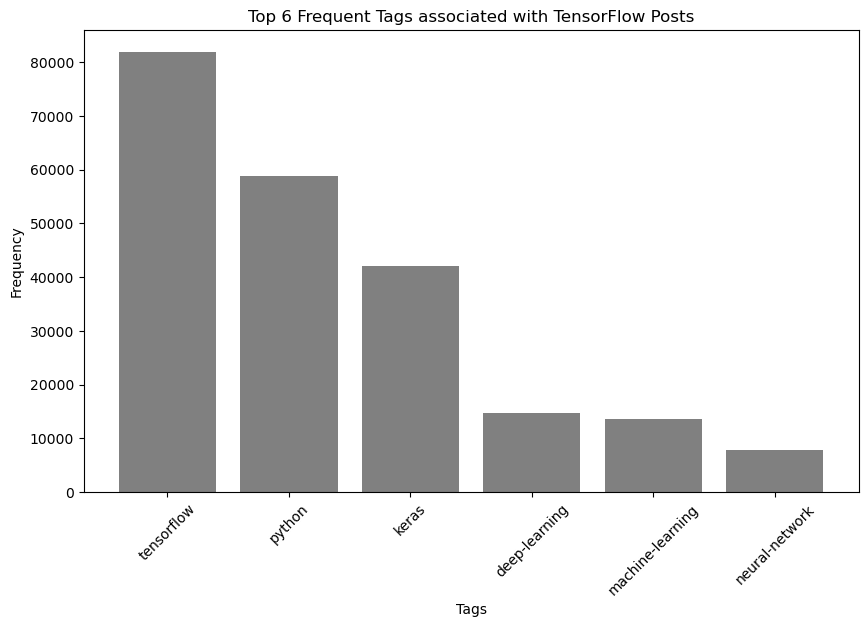

In [20]:
# Step 3: Visualization (Bar Chart)
top_n = 6  # Change the value of top_n to display more or fewer top tags
top_tags = [tag for tag, count in sorted_tags[:top_n]]
tag_counts = [count for tag, count in sorted_tags[:top_n]]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_tags, tag_counts, color='gray')
plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.title(f"Top {top_n} Frequent Tags associated with TensorFlow Posts")
plt.xticks(rotation=45)
plt.show()


### Time Series Analysis

In [21]:
# Convert 'Timestamps' column to pandas datetime format
df4['Timestamps'] = pd.to_datetime(df4['Timestamps'])

In [22]:
# Preprocess the data to extract individual tags and convert them to lowercase
preprocessed_tags = []
for tags_str in df4['tags']:
    tags_list = tags_str.strip("<>").split('><')
    preprocessed_tags.extend([tag.lower() for tag in tags_list])

In [24]:
preprocessed_tags

['java',
 'events',
 'javafx',
 'reactive-programming',
 'reactfx',
 'reactfx',
 'java',
 'netbeans',
 'javafx-2',
 'javafx-8',
 'testfx',
 'javafx',
 'breakpoints',
 'line-numbers',
 'richtextfx',
 'android',
 'android-webview',
 'jchartfx',
 'java',
 'maven',
 'javafx',
 'testfx',
 'reactive-programming',
 'frp',
 'dataflow',
 'reactfx',
 'sodiumfrp',
 'javafx',
 'reactive-programming',
 'frp',
 'undo-redo',
 'reactfx',
 'java',
 'javafx',
 'javafx-8',
 'reactfx',
 'java',
 'javafx',
 'java-8',
 'reactfx',
 'python',
 'ubuntu-14.04',
 'keras',
 'java',
 'javafx',
 'reactive-programming',
 'rx-java',
 'reactfx',
 'python',
 'theano',
 'keras',
 'python',
 'numpy',
 'canopy',
 'theano',
 'keras',
 'jquery',
 'jchartfx',
 'php',
 'jquery',
 'json',
 'jchartfx',
 'python',
 'neural-network',
 'lstm',
 'keras',
 'css',
 'javafx',
 'truetype',
 'richtextfx',
 'javafx',
 'javafx-8',
 'rx-java',
 'reactfx',
 'javafx',
 'java-8',
 'reactive-programming',
 'rx-java',
 'reactfx',
 'neural-netwo

In [148]:
preprocessed_tags.to_csv("Preprocessed.csv")

NameError: name 'preprocessed_tags' is not defined

In [27]:
# Count Tag Occurrences for each Timestamp
tag_timestamp_df = pd.DataFrame(preprocessed_tags, columns=['Tag'])
tag_timestamp_df['Timestamp'] = df4['Timestamps']

In [26]:
# Count Tag Occurrences for each Timestamp
df4['Preprocessed_Tags'] = preprocessed_tags
tag_timestamp_df = df4.groupby(['Timestamps', 'Preprocessed_Tags']).size().unstack(fill_value=0)

ValueError: Length of values (363864) does not match length of index (105435)

In [28]:
# Preprocess the data to extract individual tags and convert them to lowercase
df4['Preprocessed_Tags'] = df4['tags'].str.strip("<>").str.split('><')
df4['Preprocessed_Tags'] = df4['Preprocessed_Tags'].apply(lambda tags: [tag.lower() for tag in tags])

In [29]:
df4['Preprocessed_Tags']

0                                 [java, events, javafx, reactive-programming, reactfx]
1                                                                             [reactfx]
2                                          [java, netbeans, javafx-2, javafx-8, testfx]
3                                       [javafx, breakpoints, line-numbers, richtextfx]
4                                                  [android, android-webview, jchartfx]
                                              ...                                      
105430    [python, tensorflow, keras, generative-adversarial-network, image-generation]
105431                                             [kotlin, deployment, tflite, yolov8]
105432                                           [python, tensorflow, machine-learning]
105433                                                [javascript, node.js, tensorflow]
105434                              [python, tensorflow, machine-learning, keras, lstm]
Name: Preprocessed_Tags, Length:

In [30]:
# Explode the DataFrame to have one tag per row
tag_timestamp_df = df4.explode('Preprocessed_Tags')

In [58]:
tag_timestamp_df

,Id,Body,tags,Timestamps,Preprocessed_Tags
0,27862175,"<p>This question is perhaps aimed at the creator of <em>ReactFX</em>, but others are welcome to answer.</p>&#xA;&#xA;<p>I am currently starting to use <em>ReactFX</em> for data sharing and event h...",<java><events><javafx><reactive-programming><reactfx>,2015-01-09 13:57:42,java
0,27862175,"<p>This question is perhaps aimed at the creator of <em>ReactFX</em>, but others are welcome to answer.</p>&#xA;&#xA;<p>I am currently starting to use <em>ReactFX</em> for data sharing and event h...",<java><events><javafx><reactive-programming><reactfx>,2015-01-09 13:57:42,events
0,27862175,"<p>This question is perhaps aimed at the creator of <em>ReactFX</em>, but others are welcome to answer.</p>&#xA;&#xA;<p>I am currently starting to use <em>ReactFX</em> for data sharing and event h...",<java><events><javafx><reactive-programming><reactfx>,2015-01-09 13:57:42,javafx
0,27862175,"<p>This question is perhaps aimed at the creator of <em>ReactFX</em>, but others are welcome to answer.</p>&#xA;&#xA;<p>I am currently starting to use <em>ReactFX</em> for data sharing and event h...",<java><events><javafx><reactive-programming><reactfx>,2015-01-09 13:57:42,reactive-programming
0,27862175,"<p>This question is perhaps aimed at the creator of <em>ReactFX</em>, but others are welcome to answer.</p>&#xA;&#xA;<p>I am currently starting to use <em>ReactFX</em> for data sharing and event h...",<java><events><javafx><reactive-programming><reactfx>,2015-01-09 13:57:42,reactfx
...,...,...,...,...,...
105434,76398381,<p>I'm trying to develop a model using LSTM Encoder/Decoder structure in Keras. This model has to take in input a shuffled sequence of words and reorder them in a way that makes logical sense.&#xA...,<python><tensorflow><machine-learning><keras><lstm>,2023-06-03 23:14:43,python
105434,76398381,<p>I'm trying to develop a model using LSTM Encoder/Decoder structure in Keras. This model has to take in input a shuffled sequence of words and reorder them in a way that makes logical sense.&#xA...,<python><tensorflow><machine-learning><keras><lstm>,2023-06-03 23:14:43,tensorflow
105434,76398381,<p>I'm trying to develop a model using LSTM Encoder/Decoder structure in Keras. This model has to take in input a shuffled sequence of words and reorder them in a way that makes logical sense.&#xA...,<python><tensorflow><machine-learning><keras><lstm>,2023-06-03 23:14:43,machine-learning
105434,76398381,<p>I'm trying to develop a model using LSTM Encoder/Decoder structure in Keras. This model has to take in input a shuffled sequence of words and reorder them in a way that makes logical sense.&#xA...,<python><tensorflow><machine-learning><keras><lstm>,2023-06-03 23:14:43,keras


In [31]:
# Count Tag Occurrences for each Timestamp
tag_timestamp_df = tag_timestamp_df.groupby(['Timestamps', 'Preprocessed_Tags']).size().unstack(fill_value=0)

In [32]:
tag_timestamp_df

Preprocessed_Tags,.net,.net-6.0,.net-core,.so,16-bit,2048,2d,32-bit,32bit-64bit,3d,...,zero,zero-initialization,zero-padding,zeromq,zip,zipline,zlib,zombie-process,zsh,zynq
Timestamps,,,,,,,,,,,,,,,,,,,,,
2015-01-09 13:57:42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-02-17 16:06:36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-02-19 15:23:03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-02-22 15:40:28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-02-23 17:09:23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-03 16:41:04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-06-03 17:05:17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-06-03 18:28:42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Change the frequency to 'W' for weekly analysis
# change the frequency to 'M' for monthly analysis or 'Y' for yearly analysis
tag_timestamp_df = tag_timestamp_df.resample('M').sum()

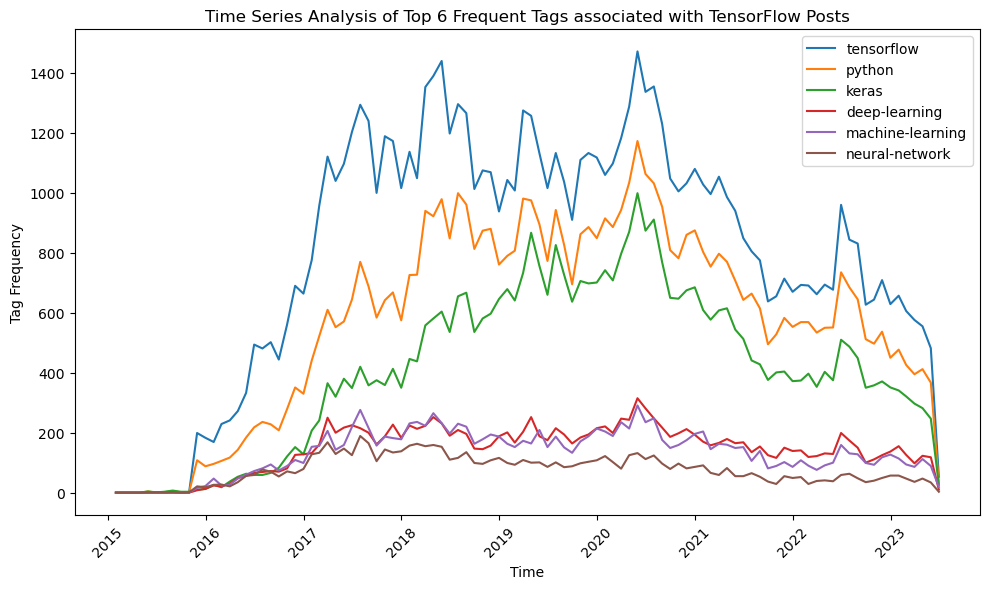

In [35]:
# Time Series Visualization
# Assuming we want to visualize the top 5 frequent tags over time
top_n = 6
fig, ax = plt.subplots(figsize=(10, 6))
for tag in tag_timestamp_df.sum().nlargest(top_n).index:
    ax.bplot(tag_timestamp_df.index, tag_timestamp_df[tag], label=tag)

ax.set_xlabel('Time')
ax.set_ylabel('Tag Frequency')
ax.set_title(f'Time Series Analysis of Top {top_n} Frequent Tags associated with TensorFlow Posts')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


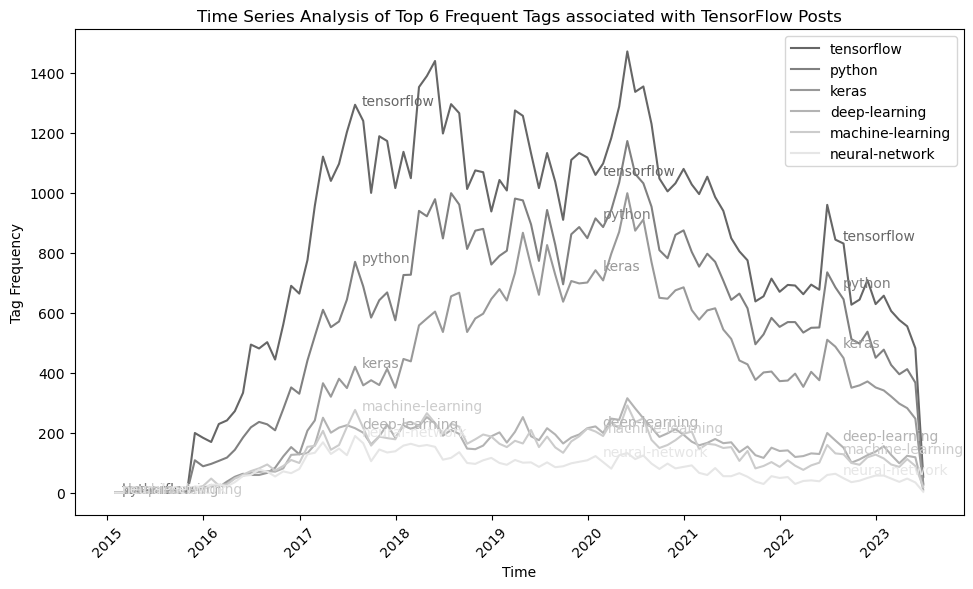

In [40]:
# Assuming we want to visualize the top 5 frequent tags over time
top_n = 6
fig, ax = plt.subplots(figsize=(10, 6))

# List of grayscale colors with varying brightness
brightness_values = np.linspace(0.4, 0.9, top_n)

# Plot each line with different shades of grayscale colors and add annotations
for i, tag in enumerate(tag_timestamp_df.sum().nlargest(top_n).index):
    grayscale_color = (brightness_values[i], brightness_values[i], brightness_values[i])
    line, = ax.plot(tag_timestamp_df.index, tag_timestamp_df[tag], label=tag, color=grayscale_color)
    # Add annotations at specific indices (e.g., every 30 data points)
    annotation_indices = np.arange(0, len(tag_timestamp_df), 30)
    for idx in annotation_indices:
        ax.annotate(tag, xy=(tag_timestamp_df.index[idx], tag_timestamp_df[tag].iloc[idx]),
                    xytext=(5, 0), textcoords='offset points', color=grayscale_color)

ax.set_xlabel('Time')
ax.set_ylabel('Tag Frequency')
ax.set_title(f'Time Series Analysis of Top {top_n} Frequent Tags associated with TensorFlow Posts')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

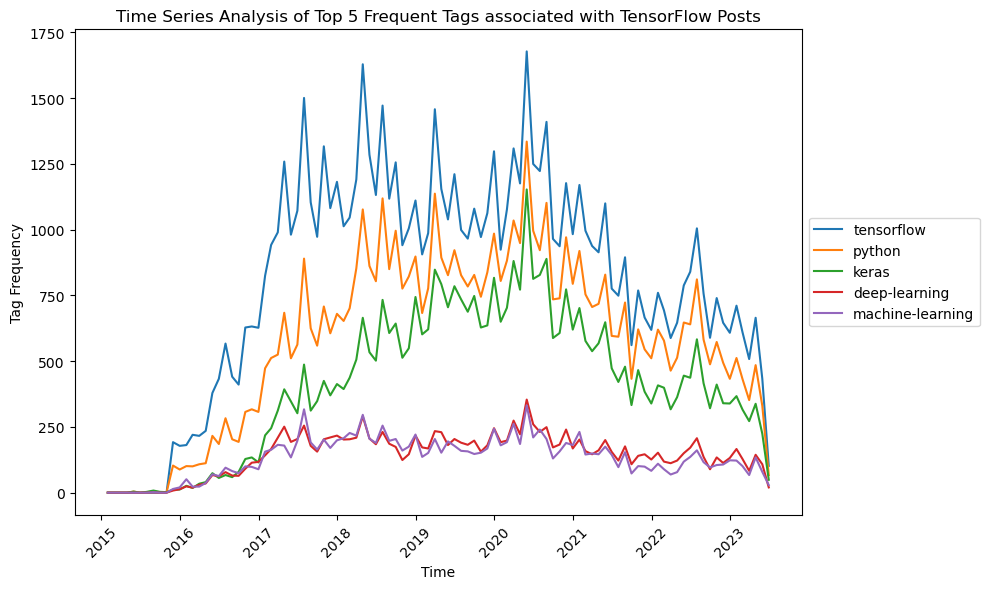

In [72]:
# Time Series Visualization
# Assuming we want to visualize the top 5 frequent tags over time
top_n = 5
top_tags = tag_timestamp_df.sum().nlargest(top_n).index
tag_timestamp_df_top = tag_timestamp_df[top_tags]

fig, ax = plt.subplots(figsize=(10, 6))
for tag in top_tags:
    ax.plot(tag_timestamp_df_top.index, tag_timestamp_df_top[tag], label=tag)

ax.set_xlabel('Time')
ax.set_ylabel('Tag Frequency')
ax.set_title(f'Time Series Analysis of Top {top_n} Frequent Tags associated with TensorFlow Posts')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

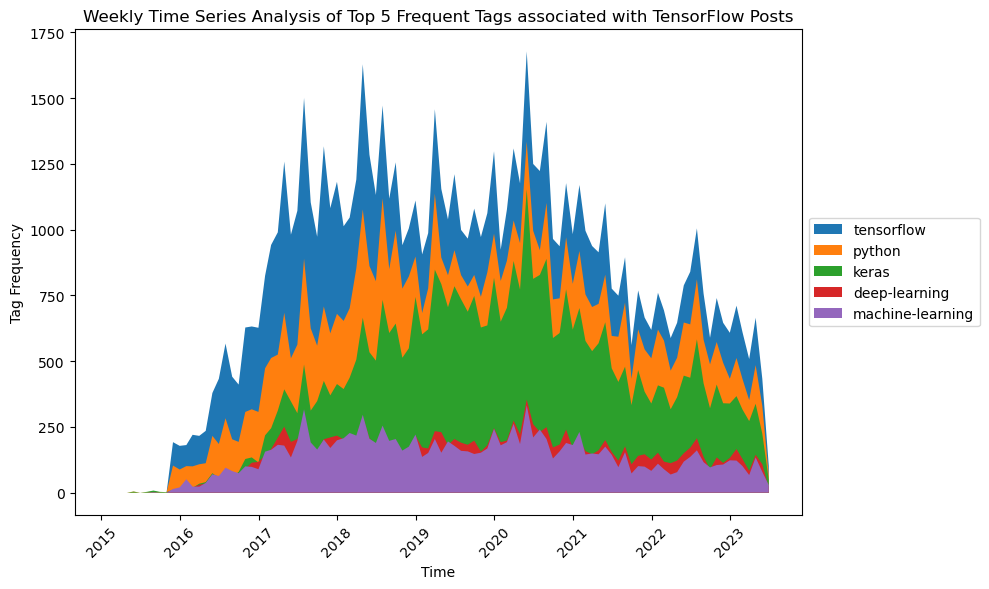

In [73]:
# Time Series Visualization with Area Chart
# Assuming we want to visualize the top 5 frequent tags over time
top_n = 5
top_tags = tag_timestamp_df.sum().nlargest(top_n).index
tag_timestamp_df_top = tag_timestamp_df[top_tags]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot area charts for each tag
for tag in top_tags:
    ax.fill_between(tag_timestamp_df_top.index, tag_timestamp_df_top[tag], label=tag)

ax.set_xlabel('Time')
ax.set_ylabel('Tag Frequency')
ax.set_title(f'Weekly Time Series Analysis of Top {top_n} Frequent Tags associated with TensorFlow Posts')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# RQ 5: What are frequent terms present in Tensorfolow posts?

In [119]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [120]:
#DB Connection establishment
db="stackoverflow"
pw="Password"
connection = create_db_connection("localhost", "root", pw, db)

MySQL Database connection successful


In [121]:
query5 = """
Select Id, Body, Title
from posts_tensorflow02
WHERE YEAR(CreationDate) >= 2015
And PostTypeId = 1;
"""

In [122]:
# Execute the query and retrieve the results into a pandas DataFrame
df5 = pd.read_sql(query5, connection)


C:\Users\x8i10\AppData\Local\Temp\ipykernel_14912\3881560471.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql(query5, connection)


In [123]:
# Close the database connection
connection.close()

In [124]:
df5

,Id,Body,Title
0,27862175,"<p>This question is perhaps aimed at the creator of <em>ReactFX</em>, but others are welcome to answer.</p>&#xA;&#xA;<p>I am currently starting to use <em>ReactFX</em> for data sharing and event h...",ReactFX Consumer listening to more than one EventStream
1,28565735,"<p>I would like to find out if there is any way of animating Text, such as changing its background colour and adding some fade transitions after a certain period of time using ReactFx. &#xA;A s...",Animating Text objects using ReactFx
2,28610085,"<p>I'm trying to implement TextFX in my project to do some UI testing. However it seems I can't get it to work properly. I've downloaded the jars from <a href=""http://search.maven.org/#search%7Cga...",@Test Annotiation not working with TestFX
3,28659716,"<p>I'm working with <a href=""https://github.com/TomasMikula/RichTextFX"">RichTextFx</a>'s CodeArea to highlight custom mini language code. </p>&#xA;&#xA;<p>Now while executing this code I want to ...",Show breakpoint at line number in RichTextFx CodeArea
4,28679310,<p>I have a complex chart (jChartFx) created using javascript inside a webview on Android. I need to be able to export this chart to a png file. </p>&#xA;&#xA;<p>I've tried using html2canvas but t...,Get absolute screen coordinates of a div inside a webview on Android
...,...,...,...
105430,76397012,"<p>I've been working on a GAN for image synthesis and have been getting the same problem no matter how much I try to change my architecture/optimizers/losses, so I've gone to the mnist dataset to ...",GAN on MNIST digit dataset generating same image after one epoch and not changing after more training
105431,76397115,<p>I'm having trouble deploying the best_float16.tflite model to Kotlin because it has a different data type compared to the code I'm following. Here are the differences I have identified...</p>&#...,Can anyone suggest fixes for incorrect implementation of the best_float16.tflite model in Kotlin?
105432,76397466,<p>I'm learning machine learning from Google's &quot;Introduction to TensorFlow&quot; course. The course teaches how to create a separate test dataset and use the model you've created to test it's...,How do I change my machine learning code to work for one image instead of an entire dataset?
105433,76397822,"<p>I get this warning:</p>&#xA;<pre><code>============================&#xA;Hi, looks like you are running TensorFlow.js in Node.js. To speed things up dram&#xA;atically, install our node backend, ...",Tensorflow.js on node.js backend for speed increase warning deprecated?


## Preprocessing method

In [125]:
from nltk.stem import WordNetLemmatizer

# Updated function to preprocess text data with improved tokenization, custom stopwords, removal of two-letter words, and Lemmatization
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text using RegexpTokenizer for improved tokenization
    tokenizer = RegexpTokenizer(r'\b\w+\b')
    tokens = tokenizer.tokenize(text)

    # Define a custom list of stopwords specific to TensorFlow posts
    custom_stopwords = set(['tensorflow', 'model', 'code', 'pre', 'ltmodulegtxa', 'xaepoch', 'msstep',
                            'relnofollow', 'noreferrerimg', 'epoch', 'call'])

    # Remove stopwords with additional ones specific to code-related posts
    stop_words = set(stopwords.words('english'))
    stop_words.update(custom_stopwords)

    # Remove two-letter words from the tokens and perform Lemmatization
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]

    # Join the tokens back to form processed text
    processed_text = ' '.join(filtered_tokens)

    return processed_text

# Apply updated text preprocessing separately to the 'Title' column
df5['processed_title'] = df5['Title'].apply(preprocess_text)

# Apply updated text preprocessing separately to the 'Body' column
df5['processed_body'] = df5['Body'].apply(preprocess_text)

# Combine 'processed_title' and 'processed_body' columns into a single column for text processing
df5['processed_text'] = df5['processed_title'] + " " + df5['processed_body']


In [126]:
# Display the processed text data
df5

,Id,Body,Title,processed_title,processed_body,processed_text
0,27862175,"<p>This question is perhaps aimed at the creator of <em>ReactFX</em>, but others are welcome to answer.</p>&#xA;&#xA;<p>I am currently starting to use <em>ReactFX</em> for data sharing and event h...",ReactFX Consumer listening to more than one EventStream,reactfx consumer listening one eventstream,question perhaps aimed creator reactfx others welcome answer currently starting use reactfx data sharing event handling within javafx application question class subscribe listen event two differen...,reactfx consumer listening one eventstream question perhaps aimed creator reactfx others welcome answer currently starting use reactfx data sharing event handling within javafx application questio...
1,28565735,"<p>I would like to find out if there is any way of animating Text, such as changing its background colour and adding some fade transitions after a certain period of time using ReactFx. &#xA;A s...",Animating Text objects using ReactFx,animating text object using reactfx,would like find way animating text changing background colour adding fade transition certain period time using reactfx simple example would appreciated thanks,animating text object using reactfx would like find way animating text changing background colour adding fade transition certain period time using reactfx simple example would appreciated thanks
2,28610085,"<p>I'm trying to implement TextFX in my project to do some UI testing. However it seems I can't get it to work properly. I've downloaded the jars from <a href=""http://search.maven.org/#search%7Cga...",@Test Annotiation not working with TestFX,test annotiation working testfx,trying implement textfx project testing however seems get work properly downloaded jar href http search maven org search 7cga 7c1 7ctestfx rel nofollow http search maven org search 7cga 7c1 7ctest...,test annotiation working testfx trying implement textfx project testing however seems get work properly downloaded jar href http search maven org search 7cga 7c1 7ctestfx rel nofollow http search ...
3,28659716,"<p>I'm working with <a href=""https://github.com/TomasMikula/RichTextFX"">RichTextFx</a>'s CodeArea to highlight custom mini language code. </p>&#xA;&#xA;<p>Now while executing this code I want to ...",Show breakpoint at line number in RichTextFx CodeArea,show breakpoint line number richtextfx codearea,working href http github com tomasmikula richtextfx richtextfx codearea highlight custom mini language executing want show small arrow front current executed line know specific line number get any...,show breakpoint line number richtextfx codearea working href http github com tomasmikula richtextfx richtextfx codearea highlight custom mini language executing want show small arrow front current...
4,28679310,<p>I have a complex chart (jChartFx) created using javascript inside a webview on Android. I need to be able to export this chart to a png file. </p>&#xA;&#xA;<p>I've tried using html2canvas but t...,Get absolute screen coordinates of a div inside a webview on Android,get absolute screen coordinate div inside webview android,complex chart jchartfx created using javascript inside webview android need able export chart png file tried using html2canvas chart rendered using svg supported next try get exact screen coordina...,get absolute screen coordinate div inside webview android complex chart jchartfx created using javascript inside webview android need able export chart png file tried using html2canvas chart rende...
...,...,...,...,...,...,...
105430,76397012,"<p>I've been working on a GAN for image synthesis and have been getting the same problem no matter how much I try to change my architecture/optimizers/losses, so I've gone to the mnist dataset to ...",GAN on MNIST digit dataset generating same image after one epoch and not changing after more training,gan mnist digit dataset generating image one changing training,working gan image synthesis getting p

###  Bigram Extraction

In [127]:
from nltk.util import ngrams
from collections import Counter

# Function to extract bigrams from text
def extract_bigrams(text):
    tokens = word_tokenize(text)
    bigrams = list(ngrams(tokens, 2))
    return bigrams



In [128]:
# Apply bigram extraction to the 'processed_text' column
df5['bigrams'] = df5['processed_text'].apply(extract_bigrams)

In [129]:
# Flatten the list of bigrams into a single list
all_bigrams = [bigram for sublist in df5['bigrams'] for bigram in sublist]

In [130]:
# Calculate the frequency of each bigram using Counter
bigram_freq = Counter(all_bigrams)

In [131]:
bigram_freq

Counter({('reactfx', 'consumer'): 1,
         ('consumer', 'listening'): 1,
         ('listening', 'one'): 1,
         ('one', 'eventstream'): 1,
         ('eventstream', 'question'): 2,
         ('question', 'perhaps'): 5,
         ('perhaps', 'aimed'): 1,
         ('aimed', 'creator'): 1,
         ('creator', 'reactfx'): 1,
         ('reactfx', 'others'): 1,
         ('others', 'welcome'): 1,
         ('welcome', 'answer'): 1,
         ('answer', 'currently'): 5,
         ('currently', 'starting'): 6,
         ('starting', 'use'): 20,
         ('use', 'reactfx'): 2,
         ('reactfx', 'data'): 1,
         ('data', 'sharing'): 2,
         ('sharing', 'event'): 1,
         ('event', 'handling'): 4,
         ('handling', 'within'): 1,
         ('within', 'javafx'): 1,
         ('javafx', 'application'): 141,
         ('application', 'question'): 8,
         ('question', 'class'): 24,
         ('class', 'subscribe'): 1,
         ('subscribe', 'listen'): 1,
         ('listen', 'event'):

In [132]:
# Display the most frequent bigrams
most_common_bigrams = bigram_freq.most_common(10)
print("Top 10 most frequent bigrams:")
for bigram, freq in most_common_bigrams:
    print(bigram, ":", freq)

Top 10 most frequent bigrams:
('site', 'package') : 78216
('href', 'http') : 61638
('quot', 'quot') : 52421
('lib', 'python3') : 51840
('kera', 'layer') : 50958
('rel', 'nofollow') : 50365
('nofollow', 'noreferrer') : 49029
('activation', 'relu') : 47513
('package', 'python') : 45868
('lib', 'site') : 36242


In [160]:
# Continue from the previous code with bigram extraction and frequency calculation

# Calculate the total count of all bigrams
total_bigram_count = sum(bigram_freq.values())

print(total_bigram_count)

20004036


In [161]:
# Create a list to store the top 10 bigrams, their counts, and percentages
top_10_bigrams = []

In [162]:
# Calculate the percentage for each bigram and store in the list
for bigram, freq in most_common_bigrams:
    percentage = (freq / total_bigram_count) * 100
    top_10_bigrams.append((bigram, freq, percentage))

In [164]:
# Print the table header
print("Top ten frequently occurring bigrams for question posts")
print("Bigram\t\tCount\tPercentage")

Top ten frequently occurring bigrams for question posts
Bigram		Count	Percentage


In [165]:
# Print the top 10 bigrams and their details
for idx, (bigram, freq, percentage) in enumerate(top_10_bigrams):
    print(f"{idx + 1}. {bigram[0]} {bigram[1]}\t{freq}\t{percentage:.2f}%")

1. site package	78216	0.39%
2. href http	61638	0.31%
3. quot quot	52421	0.26%
4. lib python3	51840	0.26%
5. kera layer	50958	0.25%
6. rel nofollow	50365	0.25%
7. nofollow noreferrer	49029	0.25%
8. activation relu	47513	0.24%
9. package python	45868	0.23%
10. lib site	36242	0.18%


In [166]:
# Calculate the count and percentage for "Others" (remaining bigrams not in the top 10)
other_count = total_bigram_count - sum(freq for _, freq in most_common_bigrams)
other_percentage = (other_count / total_bigram_count) * 100
print(f"Others\t\t{other_count}\t{other_percentage:.2f}%")

Others		19479946	97.38%


## Top 30 bigrams

In [ ]:
# Continue from the previous code with bigram extraction and frequency calculation

# Calculate the total count of all bigrams
total_bigram_count = sum(bigram_freq.values())

# Create a list to store the top 30 bigrams, their counts, and percentages
top_30_bigrams = []

In [ ]:
# Calculate the percentage for each bigram and store in the list
for bigram, freq in bigram_freq.most_common(30):
    percentage = (freq / total_bigram_count) * 100
    top_30_bigrams.append((bigram, freq, percentage))

In [169]:
# Print the table header
print("Table 4: Top 30 frequently occurring bigrams for question posts")
print("Bigram\t\tCount\tPercentage")

Table 4: Top 30 frequently occurring bigrams for question posts
Bigram		Count	Percentage


In [170]:
# Print the top 30 bigrams and their details
for idx, (bigram, freq, percentage) in enumerate(top_30_bigrams):
    print(f"{idx + 1}. {bigram[0]} {bigram[1]}\t{freq}\t{percentage:.2f}%")

1. site package	78216	0.39%
2. href http	61638	0.31%
3. quot quot	52421	0.26%
4. lib python3	51840	0.26%
5. kera layer	50958	0.25%
6. rel nofollow	50365	0.25%
7. nofollow noreferrer	49029	0.25%
8. activation relu	47513	0.24%
9. package python	45868	0.23%
10. lib site	36242	0.18%
11. file quot	32968	0.16%
12. quot line	32474	0.16%
13. python3 site	31607	0.16%
14. local lib	30677	0.15%
15. imgur com	28165	0.14%
16. http stack	27572	0.14%
17. stack imgur	27572	0.14%
18. usr local	27227	0.14%
19. dist package	22412	0.11%
20. github com	21441	0.11%
21. sess run	21372	0.11%
22. layer dense	20500	0.10%
23. http github	20311	0.10%
24. add dense	20176	0.10%
25. dtype float32	19824	0.10%
26. dense activation	18726	0.09%
27. input shape	18044	0.09%
28. file user	17067	0.09%
29. python3 dist	16939	0.08%
30. recent last	16580	0.08%


## Top 30 bigrams

In [172]:
# Continue from the previous code with bigram extraction and frequency calculation

# Calculate the total count of all bigrams
total_bigram_count = sum(bigram_freq.values())

# Create a list to store the top 30 bigrams, their counts, and percentages
top_30_bigrams = []

# Calculate the percentage for each bigram and store in the list
for bigram, freq in bigram_freq.most_common(30):
    percentage = (freq / total_bigram_count) * 100
    top_30_bigrams.append((bigram, freq, percentage))

# Print the table header
print("Table 4: Top 30 frequently occurring bigrams for question posts")
print("Bigram\t\tCount\tPercentage")

# Print the top 30 bigrams and their details
for idx, (bigram, freq, percentage) in enumerate(top_30_bigrams):
    print(f"{idx + 1}. {bigram[0]} {bigram[1]}\t{freq}\t{percentage:.2f}%")

# Calculate the count and percentage for "Others" (remaining bigrams not in the top 30)
other_count = total_bigram_count - sum(freq for _, freq, _ in top_30_bigrams)
other_percentage = (other_count / total_bigram_count) * 100
print(f"Others\t\t{other_count}\t{other_percentage:.2f}%")


Table 4: Top 30 frequently occurring bigrams for question posts
Bigram		Count	Percentage
1. site package	78216	0.39%
2. href http	61638	0.31%
3. quot quot	52421	0.26%
4. lib python3	51840	0.26%
5. kera layer	50958	0.25%
6. rel nofollow	50365	0.25%
7. nofollow noreferrer	49029	0.25%
8. activation relu	47513	0.24%
9. package python	45868	0.23%
10. lib site	36242	0.18%
11. file quot	32968	0.16%
12. quot line	32474	0.16%
13. python3 site	31607	0.16%
14. local lib	30677	0.15%
15. imgur com	28165	0.14%
16. http stack	27572	0.14%
17. stack imgur	27572	0.14%
18. usr local	27227	0.14%
19. dist package	22412	0.11%
20. github com	21441	0.11%
21. sess run	21372	0.11%
22. layer dense	20500	0.10%
23. http github	20311	0.10%
24. add dense	20176	0.10%
25. dtype float32	19824	0.10%
26. dense activation	18726	0.09%
27. input shape	18044	0.09%
28. file user	17067	0.09%
29. python3 dist	16939	0.08%
30. recent last	16580	0.08%
Others		19008292	95.02%


### Link Analysis

To investigate the presence of external links in TensorFlow-related questions, we use an SQL query to select the ID and a substring of the body containing links from the `posts_tensorflow02` table. The query filters posts that contain 'http' in their body, indicating the presence of links. This analysis helps in understanding how often and what types of external resources are referenced in TensorFlow questions on Stack Overflow.


In [46]:
#DB Connection establishment
db="stackoverflow"
pw="Password"
connection = create_db_connection("localhost", "root", pw, db)

MySQL Database connection successful


In [47]:
query_link = """
SELECT
    Id AS "Question id",
    Body AS "Links present in the question body field"
FROM
    posts_tensorflow02
WHERE
    Body LIKE '%http%';
"""

In [48]:
query_link2 = """
SELECT
    Id AS "Question id",
    SUBSTR(Body, IFNULL(NULLIF(INSTR(Body, 'http://'), 0), 1), 150) AS "Links present in the question body field"
FROM
    posts_tensorflow02
WHERE
    Body LIKE '%http%'
"""

In [44]:
# Execute the query and retrieve the results into a pandas DataFrame
df_link = pd.read_sql(query_link, connection)

C:\Users\x8i10\AppData\Local\Temp\ipykernel_11848\3102336143.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_link = pd.read_sql(query_link, connection)


In [49]:
df_link2 = pd.read_sql(query_link2, connection)

C:\Users\x8i10\AppData\Local\Temp\ipykernel_11848\2270657563.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_link2 = pd.read_sql(query_link2, connection)


In [50]:
# Close the database connection
connection.close()

In [30]:
df_link

,Question id,Links present in the question body field
0,7800544,<p>A number of delphi applications that I work with use an activex chartfx control. I realize that the company softwarefx stopped supporting delphi a while ago but we are transitioning to 64 bit b...
1,15073168,<pre><code>Chart chart1 = new Chart(); //ChartFX&#xA;chart1.DataSourceSettings.DataSource = dset.Tables[0];&#xA;chart1.Data.Series = 2;&#xA;DataSetDataValuesTableAdapters.DataValuesTableAdapter a...
2,15925527,"<p>I'm using the following XML for ChartFX: &#xA;<a href=""http://pastebin.com/sR1N61Ss"" rel=""nofollow"">http://pastebin.com/sR1N61Ss</a></p>&#xA;&#xA;<p>The following line is causing the issue:</p>..."
3,16042362,"<p>I am trying to integrate this component jchartfx with Durandel. I have a standalone prototype using knockout without Durandel and it works perfectly, so I am convinced the issue is Durandel rel..."
4,18579777,"<p>any ideas how to change the chart proportions relative to its parent chart div?</p>&#xA;&#xA;<p>Currently it looks like this</p>&#xA;&#xA;<p><img src=""https://i.stack.imgur.com/xwGHw.png"" alt=""..."
...,...,...
40602,76396703,"<p>I am working on a self learning project. I've developed a really basic fully custom neural network whose weights I've saved as JSON object. <a href=""https://i.stack.imgur.com/qHke5.png"" rel=""no..."
40603,76396850,<p>Getting below InvalidArgumentError: Graph execution error: Detected at node 'mean_squared_error/SquaredDifference' while calling retinanet.fit function.</p>&#xA;<p>Node: 'mean_squared_error/Squ...
40604,76397012,"<p>I've been working on a GAN for image synthesis and have been getting the same problem no matter how much I try to change my architecture/optimizers/losses, so I've gone to the mnist dataset to ..."
40605,76397115,<p>I'm having trouble deploying the best_float16.tflite model to Kotlin because it has a different data type compared to the code I'm following. Here are the differences I have identified...</p>&#...


In [51]:
df_link2

,Question id,Links present in the question body field
0,7800544,"http://www.filefactory.com/file/ce61229/n/Cfx62ClientServer_TLB.pas"" rel=""nofollow"">http://www.filefactory.com/file/ce61229/n/Cfx62ClientServer_TLB.pa"
1,15073168,"http://www.softwarefx.com/sfxNetProducts/ChartFX/features/default.aspx"" rel=""nofollow"">chartFX</a> chart. I need to connect another DataSource to the"
2,15925527,"http://pastebin.com/sR1N61Ss"" rel=""nofollow"">http://pastebin.com/sR1N61Ss</a></p>&#xA;&#xA;<p>The following line is causing the issue:</p>&#xA;&#xA;<p"
3,16042362,<p>I am trying to integrate this component jchartfx with Durandel. I have a standalone prototype using knockout without Durandel and it works perfectl
4,18579777,"http://support.softwarefx.com/jChartFX/article/2501235#27182674-0690-e211-84a5-0019b9e6b500"" rel=""nofollow noreferrer"">http://support.softwarefx.com/j"
...,...,...
40602,76396703,<p>I am working on a self learning project. I've developed a really basic fully custom neural network whose weights I've saved as JSON object. <a href
40603,76396850,<p>Getting below InvalidArgumentError: Graph execution error: Detected at node 'mean_squared_error/SquaredDifference' while calling retinanet.fit func
40604,76397012,<p>I've been working on a GAN for image synthesis and have been getting the same problem no matter how much I try to change my architecture/optimizers
40605,76397115,<p>I'm having trouble deploying the best_float16.tflite model to Kotlin because it has a different data type compared to the code I'm following. Here


In [34]:
# Extract link domains
df_link['Link domain'] = df_link['Links present in the question body field'].str.extract(r'https?://([A-Za-z_0-9.-]+)')

In [52]:
# Extract link domains
df_link2['Link domain'] = df_link2['Links present in the question body field'].str.extract(r'https?://([A-Za-z_0-9.-]+)')

In [35]:
df_link

,Question id,Links present in the question body field,Link domain
0,7800544,<p>A number of delphi applications that I work with use an activex chartfx control. I realize that the company softwarefx stopped supporting delphi a while ago but we are transitioning to 64 bit b...,www.filefactory.com
1,15073168,<pre><code>Chart chart1 = new Chart(); //ChartFX&#xA;chart1.DataSourceSettings.DataSource = dset.Tables[0];&#xA;chart1.Data.Series = 2;&#xA;DataSetDataValuesTableAdapters.DataValuesTableAdapter a...,www.softwarefx.com
2,15925527,"<p>I'm using the following XML for ChartFX: &#xA;<a href=""http://pastebin.com/sR1N61Ss"" rel=""nofollow"">http://pastebin.com/sR1N61Ss</a></p>&#xA;&#xA;<p>The following line is causing the issue:</p>...",pastebin.com
3,16042362,"<p>I am trying to integrate this component jchartfx with Durandel. I have a standalone prototype using knockout without Durandel and it works perfectly, so I am convinced the issue is Durandel rel...",NaN
4,18579777,"<p>any ideas how to change the chart proportions relative to its parent chart div?</p>&#xA;&#xA;<p>Currently it looks like this</p>&#xA;&#xA;<p><img src=""https://i.stack.imgur.com/xwGHw.png"" alt=""...",i.stack.imgur.com
...,...,...,...
40602,76396703,"<p>I am working on a self learning project. I've developed a really basic fully custom neural network whose weights I've saved as JSON object. <a href=""https://i.stack.imgur.com/qHke5.png"" rel=""no...",i.stack.imgur.com
40603,76396850,<p>Getting below InvalidArgumentError: Graph execution error: Detected at node 'mean_squared_error/SquaredDifference' while calling retinanet.fit function.</p>&#xA;<p>Node: 'mean_squared_error/Squ...,i.stack.imgur.com
40604,76397012,"<p>I've been working on a GAN for image synthesis and have been getting the same problem no matter how much I try to change my architecture/optimizers/losses, so I've gone to the mnist dataset to ...",i.stack.imgur.com
40605,76397115,<p>I'm having trouble deploying the best_float16.tflite model to Kotlin because it has a different data type compared to the code I'm following. Here are the differences I have identified...</p>&#...,i.stack.imgur.com


In [53]:
df_link2

,Question id,Links present in the question body field,Link domain
0,7800544,"http://www.filefactory.com/file/ce61229/n/Cfx62ClientServer_TLB.pas"" rel=""nofollow"">http://www.filefactory.com/file/ce61229/n/Cfx62ClientServer_TLB.pa",www.filefactory.com
1,15073168,"http://www.softwarefx.com/sfxNetProducts/ChartFX/features/default.aspx"" rel=""nofollow"">chartFX</a> chart. I need to connect another DataSource to the",www.softwarefx.com
2,15925527,"http://pastebin.com/sR1N61Ss"" rel=""nofollow"">http://pastebin.com/sR1N61Ss</a></p>&#xA;&#xA;<p>The following line is causing the issue:</p>&#xA;&#xA;<p",pastebin.com
3,16042362,<p>I am trying to integrate this component jchartfx with Durandel. I have a standalone prototype using knockout without Durandel and it works perfectl,NaN
4,18579777,"http://support.softwarefx.com/jChartFX/article/2501235#27182674-0690-e211-84a5-0019b9e6b500"" rel=""nofollow noreferrer"">http://support.softwarefx.com/j",support.softwarefx.com
...,...,...,...
40602,76396703,<p>I am working on a self learning project. I've developed a really basic fully custom neural network whose weights I've saved as JSON object. <a href,NaN
40603,76396850,<p>Getting below InvalidArgumentError: Graph execution error: Detected at node 'mean_squared_error/SquaredDifference' while calling retinanet.fit func,NaN
40604,76397012,<p>I've been working on a GAN for image synthesis and have been getting the same problem no matter how much I try to change my architecture/optimizers,NaN
40605,76397115,<p>I'm having trouble deploying the best_float16.tflite model to Kotlin because it has a different data type compared to the code I'm following. Here,NaN


In [20]:
df_new = df_link[['Question id', 'Link domain']]

In [40]:
df_link2_new = df_link2[['Question id', 'Link domain']]

In [22]:
df_new.to_csv('Link_Output.csv', index=False)

In [18]:
df_link.to_csv('Link_Output.csv', index=False)

In [54]:
df_link2.to_csv('Link2N_Output.csv', index=False)

### Mapping Between Question and Acceptance

This analysis examines the relationship between TensorFlow questions and their acceptance status on Stack Overflow. The SQL query selects the question ID, title, accepted answer ID, and answer ID, categorizing each question as either 'Accepted' or 'Not Accepted' based on the presence of an accepted answer. The query filters for posts with PostTypeId 1, ensuring only questions are included. This mapping provides insights into the acceptance rates of TensorFlow-related questions.


In [5]:
#DB Connection establishment
db="stackoverflow"
pw="Password"
connection = create_db_connection("localhost", "root", pw, db)

MySQL Database connection successful


In [6]:
query_mapping = """
SELECT 
    p.Id AS QuestionId,
    p.Title AS QuestionTitle,
    p.AcceptedAnswerId AS AcceptedAnswerId,
    a.Id AS AnswerId,
    CASE 
        WHEN p.AcceptedAnswerId IS NOT NULL THEN 'Accepted'
        ELSE 'Not Accepted'
    END AS AcceptanceStatus
FROM 
    posts_tensorflow02 p
LEFT JOIN 
    answers_tensorflow02 a ON p.AcceptedAnswerId = a.Id
WHERE 
    p.PostTypeId = 1; -- Filtering only questions;
"""

In [7]:
# Execute the query and retrieve the results into a pandas DataFrame
dfQuesAccepMapping = pd.read_sql(query_mapping, connection)

C:\Users\x8i10\AppData\Local\Temp\ipykernel_1652\44248102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfQuesAccepMapping = pd.read_sql(query_mapping, connection)


In [8]:
# Close the database connection
connection.close()

In [9]:
dfQuesAccepMapping

,QuestionId,QuestionTitle,AcceptedAnswerId,AnswerId,AcceptanceStatus
0,71755,Export ChartFX7 to SVG in Java,NaN,NaN,Not Accepted
1,83104,ChatFx Lite LicenseException on build server,NaN,NaN,Not Accepted
2,648134,Access violation when accessing a COM object from .Net,662200.0,662200.0,Accepted
3,1677956,Couldn't get Design Time license for 'SoftwareFX.ChartFX.Chart' error in C# solution,1678004.0,1678004.0,Accepted
4,2073441,Is ChartFX 6.2 compatible with Vista and Windows 7,NaN,NaN,Not Accepted
...,...,...,...,...,...
105488,76397012,GAN on MNIST digit dataset generating same image after one epoch and not changing after more training,NaN,NaN,Not Accepted
105489,76397115,Can anyone suggest fixes for incorrect implementation of the best_float16.tflite model in Kotlin?,NaN,NaN,Not Accepted
105490,76397466,How do I change my machine learning code to work for one image instead of an entire dataset?,NaN,NaN,Not Accepted
105491,76397822,Tensorflow.js on node.js backend for speed increase warning deprecated?,NaN,NaN,Not Accepted


In [10]:
# Count the occurrences of each AcceptanceStatus
acceptance_counts = dfQuesAccepMapping['AcceptanceStatus'].value_counts()

In [14]:
# Display the counts
print(acceptance_counts)

Not Accepted    66221
Accepted        39272
Name: AcceptanceStatus, dtype: int64


### Analysis of Posts with Accepted Answers

This analysis focuses on TensorFlow-related questions that have accepted answers and examines the time taken for these answers to be accepted. The SQL query retrieves the question ID, title, creation date, body, answer ID, and answer creation date. It also calculates the number of years between the question's creation and the acceptance of the answer. The query filters for questions and answers from 2015 onwards and includes only those with an acceptance period of one year or more. This analysis helps in understanding the long-term acceptance patterns of TensorFlow-related questions on Stack Overflow.


In [4]:
#DB Connection establishment
db="stackoverflow"
pw="Password"
connection = create_db_connection("localhost", "root", pw, db)

MySQL Database connection successful


In [5]:
query_acceptanceAnswer = """
SELECT posts_with_year.Id AS QuestionId,
       posts_with_year.Title AS QuestionTitle,
       posts_with_year.CreationDate AS QuestionCreationDate,
       posts_with_year.Body AS QuestionBody,
       answers_tensorflow02.Id AS AnswerId,
       answers_tensorflow02.CreationDate AS AnswerCreationDate,
       FLOOR(DATEDIFF(answers_tensorflow02.CreationDate, posts_with_year.CreationDate) / 365) AS YearsToAccept
FROM (
    SELECT posts_tensorflow02.*, YEAR(posts_tensorflow02.CreationDate) AS Year
    FROM posts_tensorflow02
    WHERE YEAR(posts_tensorflow02.CreationDate) >= 2015
) AS posts_with_year
INNER JOIN answers_tensorflow02 ON posts_with_year.AcceptedAnswerId = answers_tensorflow02.Id
HAVING YearsToAccept >= 1;
"""

In [6]:
# Execute the query and retrieve the results into a pandas DataFrame
dfacceptanceAnswer = pd.read_sql(query_acceptanceAnswer, connection)

C:\Users\x8i10\AppData\Local\Temp\ipykernel_3816\1707309397.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfacceptanceAnswer = pd.read_sql(query_acceptanceAnswer, connection)


In [7]:
# Close the database connection
connection.close()

In [8]:
dfacceptanceAnswer 

,QuestionId,QuestionTitle,QuestionCreationDate,QuestionBody,AnswerId,AnswerCreationDate,YearsToAccept
0,33620794,How to build and use Google TensorFlow C++ api,2015-11-10 00:18:33,<p>I'm really eager to start using Google's new Tensorflow library in C++. The website and docs are just really unclear in terms of how to build the project's C++ API and I don't know where to sta...,62245422,2020-06-07 12:36:43,4
1,33640581,How to do Xavier initialization on TensorFlow,2015-11-10 22:07:54,<p>I'm porting my Caffe network over to TensorFlow but it doesn't seem to have xavier initialization. I'm using <code>truncated_normal</code> but this seems to be making it a lot harder to train.<...,55334946,2019-03-25 09:42:07,3
2,33731875,TensorFlow IOError: [Errno socket error] [Errno 104] Connection reset by peer,2015-11-16 09:18:43,"<p>I have installed TensorFlow. When I download MNISTdataset, there exists one error. Who can tell me what's wrong? Thanks very much! The error detail as follows:</p>&#xA;&#xA;<pre><code>Python 2....",42618440,2017-03-06 05:51:55,1
3,33759623,How to save/restore a model after training?,2015-11-17 14:37:26,<p>After you train a model in Tensorflow: </p>&#xA;&#xA;<ol>&#xA;<li>How do you save the trained model?</li>&#xA;<li>How do you later restore this saved model?</li>&#xA;</ol>&#xA;,50852627,2018-06-14 08:10:11,2
4,33810016,TensorFlow dependencies needed. How to run TensorFlow on Windows,2015-11-19 17:01:21,"&#xA;&#xA;<p>I am interested in getting TensorFlow to run on Windows, however at present I realize that this is not possible due to some of the dependencies not being usable with Windows, e.g. Baz...",40848593,2016-11-28 16:03:02,1
...,...,...,...,...,...,...,...
355,68596302,F1 Score metric per class in Tensorflow,2021-07-30 19:37:45,"<p>I have implemented the following metric to look at Precision and Recall of the classes I deem relevant.</p>&#xA;<pre><code>metrics=[tf.keras.metrics.Recall(class_id=1, name='Bkwd_R'),tf.keras.m...",73492710,2022-08-25 19:18:01,1
356,68954373,why tensorflow uses 100% of all CPU cores?,2021-08-27 13:36:14,"<p>I've made a fresh install of Jupyter Notebook kernel and python packages, including tensorflow 2.4.1 (using miniconda env).</p>&#xA;<p>When I train and test a model, my CPU usage saturate. In m...",74465066,2022-11-16 17:53:05,1
357,69113605,TFX runs out of memory on 32GB of RAM with only a 232.9MB TFRecord file. Is there something wrong with my code?,2021-09-09 07:00:34,<p>I am trying to train a model that detects whether someone is using sunglasses using tfx and a subset of the celebsA dataset (~ 26k images). I have written the images and labels to a TFrecord th...,75198469,2023-01-22 05:55:40,1
358,69317240,How to drop a row of a tensor tensor containing nan in TensorFlow,2021-09-24 15:04:44,"<p>I have a tensor:</p>&#xA;<pre><code>tensor = tf.convert_to_tensor(np.array([[0, 1, 2, 3, 4, np.nan],&#xA; [6, 7, 8, 9, 10, 11]]))&#xA;</code></pre>&#xA;<p>...",74881550,2022-12-21 20:39:27,1


In [9]:
dfacceptanceAnswer.to_csv("Records_acceptanceAnswer.csv")

In [22]:
# Assuming your dataframe is called 'df'
confidence_level = 0.95
margin_of_error = 0.05

# Step 1: Calculate the required sample size
Z = 1.96  # For 95% confidence level
p = 0.5   # Using 0.5 for maximum variability (no prior estimate)
E = margin_of_error

sample_size = int(np.ceil((Z**2 * p * (1 - p)) / E**2))
# Updated May,2024: sample size formula calculation above needs review. Therefore i have specified the sample size manually 
# from https://www.calculator.net/sample-size-calculator.html?type=1&cl=95&ci=5&pp=50&ps=360&x=Calculate
sample_size = 187

In [23]:
# Step 2: Check the population size
population_size = len(dfacceptanceAnswer)

# Ensure sample size does not exceed population size
if sample_size > population_size:
    print(f"Sample size ({sample_size}) exceeds population size ({population_size}). Adjusting sample size to population size.")
    sample_size = population_size

In [24]:
# Step 3: Randomly select 'sample_size' observations from the dataframe
random_sample_acceptanceAnswer = dfacceptanceAnswer.sample(n=sample_size, random_state=42)  # Use a random_state for reproducibility

# Now 'random_sample' contains your random sample with the desired confidence level and margin of error.

In [21]:
random_sample_acceptanceAnswer

,QuestionId,QuestionTitle,QuestionCreationDate,QuestionBody,AnswerId,AnswerCreationDate,YearsToAccept
224,52665441,nvcc error: string_view.h: constexpr function return is non-constant,2018-10-05 12:16:15,"<p>I'm trying to compile some TensorFlow native op with CUDA code.&#xA;I'm using Python 3.6 and TensorFlow 1.11 here, and CUDA 8.0, on Ubuntu 16.</p>&#xA;&#xA;<p>More specifically:</p>&#xA;&#xA;<p...",63591721,2020-08-26 06:29:30,1
42,38451198,Tensorflow - How to translate models into other languages,2016-07-19 06:40:56,<p>I'm using tensorflow to classify images in a dataset. It's python api is so easy and useful. It gives me some english tags for each image when I use inception v3 model. I want to how I can tran...,48732227,2018-02-11 13:53:57,1
285,57718883,"InvalidArgumentError: ValueError: `generator` yielded an element of shape (59, 224, 224, 3)",2019-08-29 23:45:26,"<p>I tried to follow this popular Tensorflow tutorial.</p>&#xA;&#xA;<p>Which basically should be a copy-paste, but I still get an error in my code.</p>&#xA;&#xA;<p>I have tried use None as a shape...",73797414,2022-09-21 08:13:25,3
302,60295760,Detecting and tracking the human hand with OpenCV,2020-02-19 08:18:26,<p>I am new to OpenCV and Tensorflow. I have created a classifier using Tensorflow 2.0 to detect 26 alphabets of the American Sign language. </p>&#xA;&#xA;<p>This is the CNN code.</p>&#xA;&#xA;<pr...,67100881,2021-04-15 01:01:09,1
56,40092376,It's possible to do object detection (one-class) in images retraining Inception model?,2016-10-17 17:32:25,"<p>There is a way to do object detection, retraining Inception model provided by Google in Tensorflow? The goal is to predict wheter an image contains a defined category of objects (e.g. balls) or...",48875538,2018-02-19 23:09:55,1
...,...,...,...,...,...,...,...
179,49161174,Tensorflow : logits and labels must have the same first dimension,2018-03-07 21:05:14,"<p>I am new in tensoflow and I want to adapt the MNIST tutorial <a href=""https://www.tensorflow.org/tutorials/layers"" rel=""noreferrer"">https://www.tensorflow.org/tutorials/layers</a> with my own d...",62286888,2020-06-09 16:04:57,2
233,53740577,"Does Any one got ""AttributeError: 'str' object has no attribute 'decode' "" , while Loading a Keras Saved Model",2018-12-12 10:07:14,"<p>After Training, I saved Both Keras whole Model and Only Weights using </p>&#xA;&#xA;<pre><code>model.save_weights(MODEL_WEIGHTS) and model.save(MODEL_NAME)&#xA;</code></pre>&#xA;&#xA;<p>Models ...",64635871,2020-11-01 19:08:53,1
223,52651749,How to print summary of only last n layers of a model in keras,2018-10-04 16:42:19,"<p><code>model.summary()</code> prints details of the entire model. Is there a way to just print the last n layer(s) summary only?</p>&#xA;&#xA;<p>If not, can I create a new model from the last n ...",71480223,2022-03-15 09:58:52,3
117,44147764,Limit neural network output to subset of trained classes,2017-05-24 02:05:33,"<p>Is it possible to pass a vector to a trained neural network so it only chooses from a subset of the classes it was trained to recognize. For example, I have a network trained to recognize numbe...",55675749,2019-04-14 13:21:07,1


In [25]:
random_sample_acceptanceAnswer.to_csv("random_sample_acceptanceAnswer.csv")